# Visualizaciones

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/Visualizations


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Estadísticas descriptivas pde acuerdo a la agencia libre

Primero, veremos las estadísticas que engloban datos generales para observar si hay diferencia entre agentes libres y los que no lo son.

In [14]:
panel_hitter_path = 'ETL_Data/Agent/First_Year_Contract/Period_t/Hitters/All_Hitters/panel_hitters' + '.csv'
panel_pitcher_path = 'ETL_Data/Agent/First_Year_Contract/Period_t/Pitchers/All_Pitchers/panel_pitchers' + '.csv'

In [15]:
df_panel_hitter = pd.read_csv(panel_hitter_path)
df_panel_pitcher = pd.read_csv(panel_pitcher_path)

Veamos el contenido de las bases de datos

In [16]:
df_panel_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Acronimo                            6814 non-null   object 
 1   Agente_libre                        6814 non-null   object 
 2   Altura                              6814 non-null   float64
 3   Anio                                6814 non-null   int64  
 4   Anio_de_agente_libre                6814 non-null   int64  
 5   Anios_de_contrato                   6814 non-null   int64  
 6   Antiguedad                          6814 non-null   int64  
 7   At-bats                             6814 non-null   int64  
 8   At-bats_2                           6814 non-null   int64  
 9   Bateos                              6814 non-null   int64  
 10  Bateos_2                            6814 non-null   int64  
 11  Bateos_promedio                     6814 no

In [17]:
df_panel_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acronimo                 5764 non-null   object 
 1   Agente_libre             5764 non-null   object 
 2   Altura                   5764 non-null   float64
 3   Anio                     5764 non-null   int64  
 4   Anio_de_agente_libre     5764 non-null   int64  
 5   Anios_de_contrato        5764 non-null   int64  
 6   Antiguedad               5764 non-null   int64  
 7   Bateos_en_contra         5764 non-null   int64  
 8   Bateos_en_contra_2       5764 non-null   int64  
 9   Bono_por_firma           5764 non-null   int64  
 10  Cantidad de equipos      5764 non-null   int64  
 11  Cantidad_agentes_libres  5764 non-null   int64  
 12  Carreras_en_contra       5764 non-null   int64  
 13  Carreras_en_contra_2     5764 non-null   int64  
 14  Carreras_ganadas        

### Comparación entre jugadores normales y agentes libres

Primero, indiquemos qué variables son de interes para graficar, en este caso, las estadísticas deportivas que son propias tanto de los jugadores que son agentes libres como los que no lo son. Además, son de suma importancia graficar los salarios

In [18]:
hitter_statistics = ['At-bats', 'Bateos_promedio', 'Dobles', 
                     'Home-runs', 'Porcentaje_On-base-plus-slugging',
                     'Porcentaje_juegos', 'Porcentaje_juegos_iniciados',
                     'Porcentaje_on-base', 'Porcentaje_slugging', 'Runs-batted-in',
                     'Triples', 'WAR']
pitcher_statistics = ['Bateos_en_contra', 'Carreras_en_contra', 'Carreras_ganadas',
                      'Comando', 'Control', 'Dominio', 'ERA', 'Inning_pitched',
                      'Juegos', 'Juegos_iniciados', 'Losses', 'Saves',
                      'Strike-outs', 'WAR', 'WHIP', 'Walks', 'Wins']

In [19]:
hitter_labels = ['At-bats', 'Bateos promedio', 'Dobles', 
                 'Home-runs', '%On-base-plus-slugging',
                 '%Partidos jugados', '%Juegos iniciados',
                 '%On-base', '%Slugging', 'Runs-batted-in',
                 'Triples', 'WAR']
pitcher_labels = ['Bateos_en_contra', 'Carreras en contra', 'Carreras ganadas',
                  'Comando', 'Control', 'Dominio', 'ERA', 'Inning pitched',
                  'Partidos jugados', 'Juegos iniciados', 'Losses', 'Saves',
                  'Strike-outs', 'WAR', 'WHIP', 'Walks', 'Wins']

## Boxplots

Creemos las listas y diccionarios correspondientes

In [103]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, -2.5, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]

In [104]:
# Estilos para los boxplots usando los kwargs para guardar los estilos de los distintos parámetros que componen el gráfico
kws_1 = {'boxprops':{'facecolor':(239/255,173/255,1/255,0.5),
                     'edgecolor':'black',
                     'linestyle':'solid',
                     'linewidth':3},
         'medianprops':{'color':'red',
                        'linewidth':3},
         'whiskerprops':{'color':'black'},
         'flierprops' :{'marker':'o',
                        'markerfacecolor':'#efad01',
                        'markersize':15,
                        'linewidth':5,
                        'markeredgecolor':'red'},
         'capprops':{'color':'black'}}

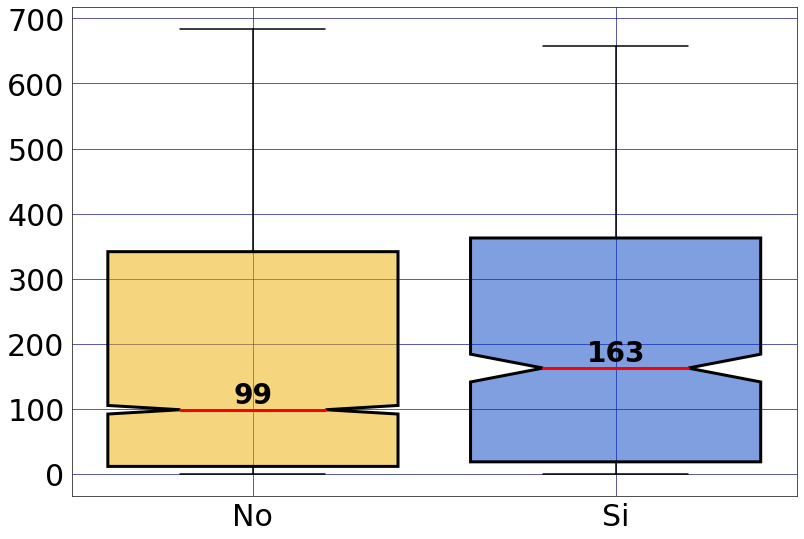

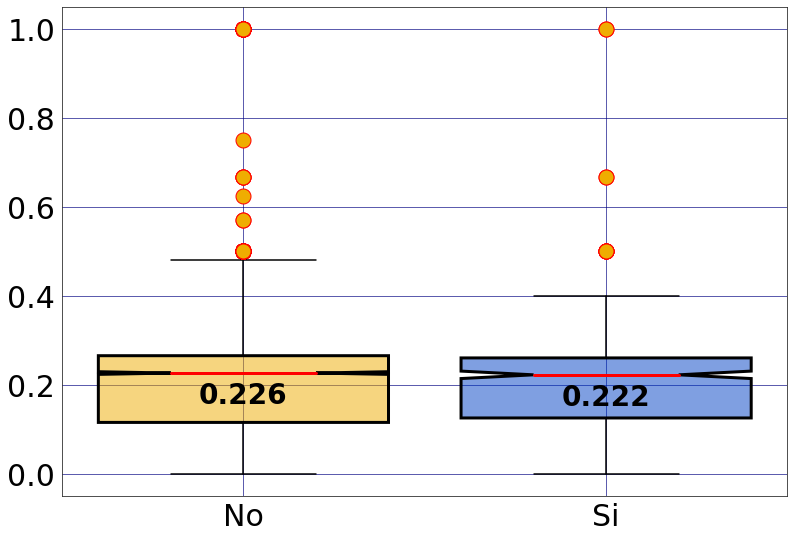

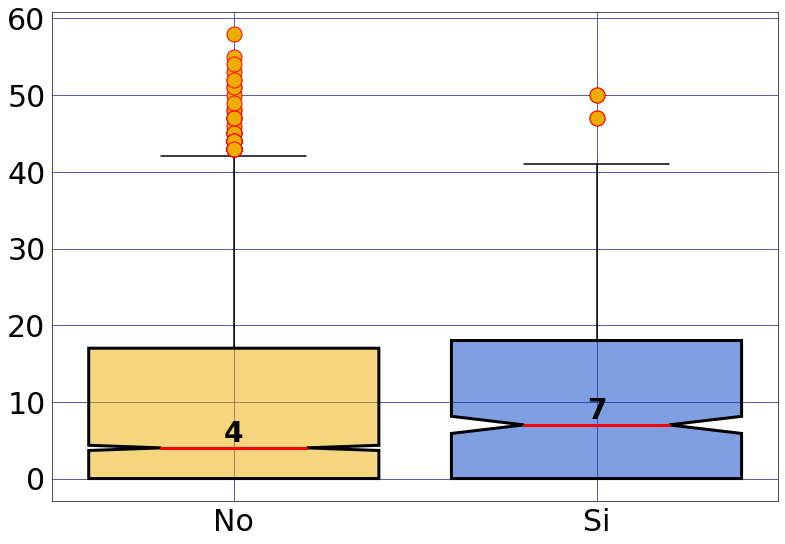

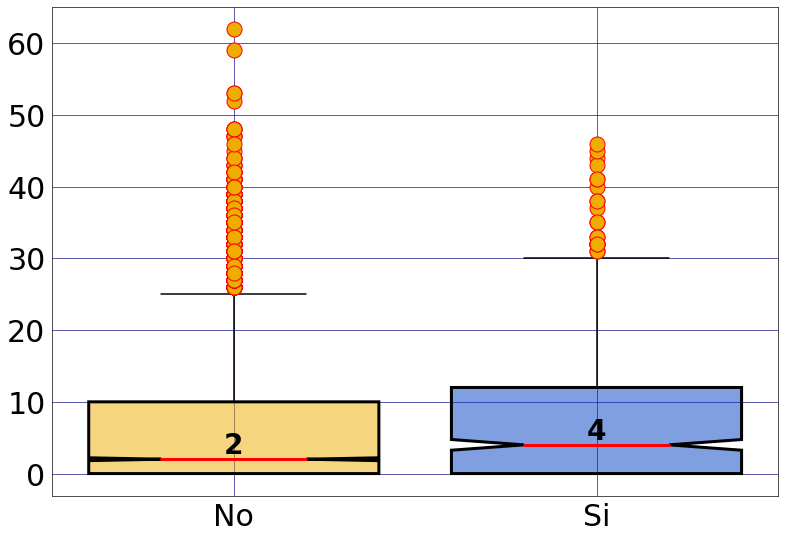

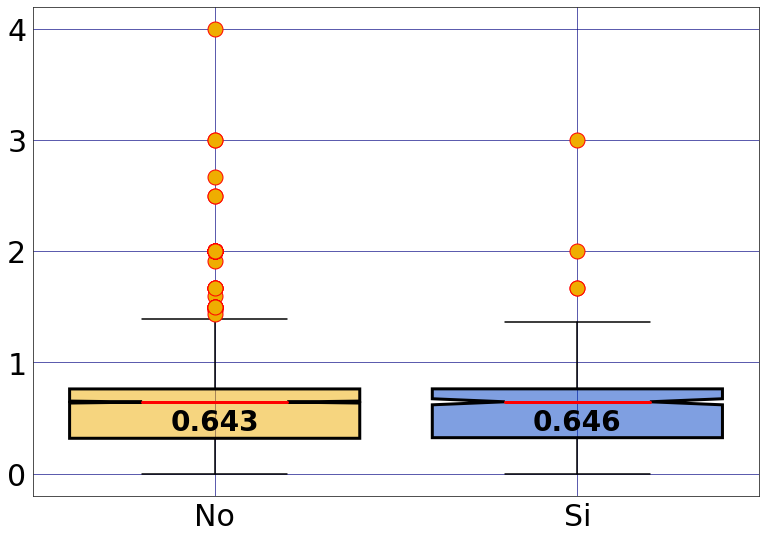

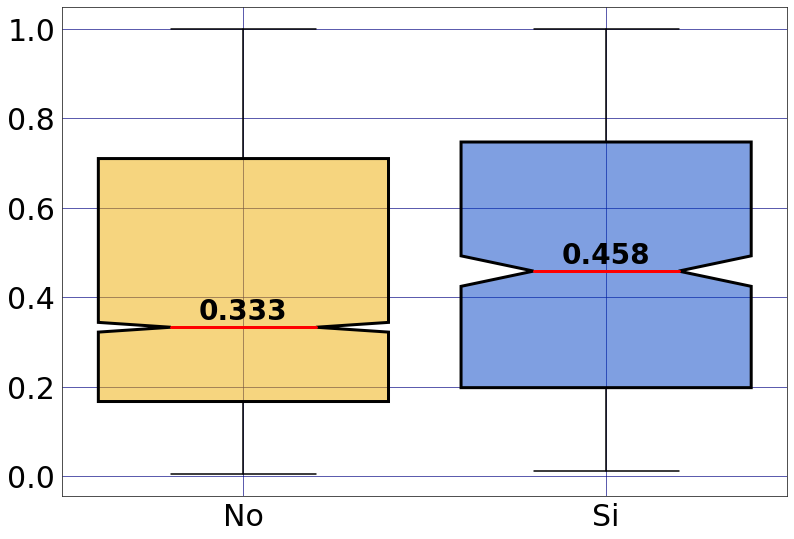

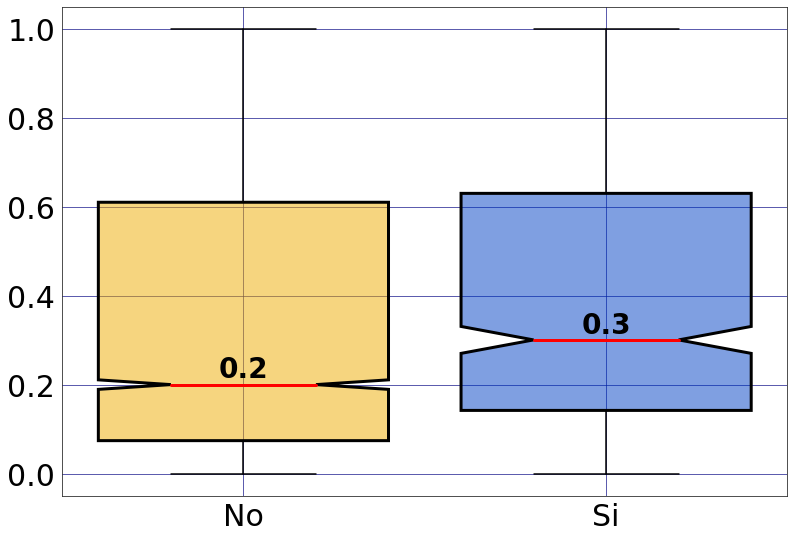

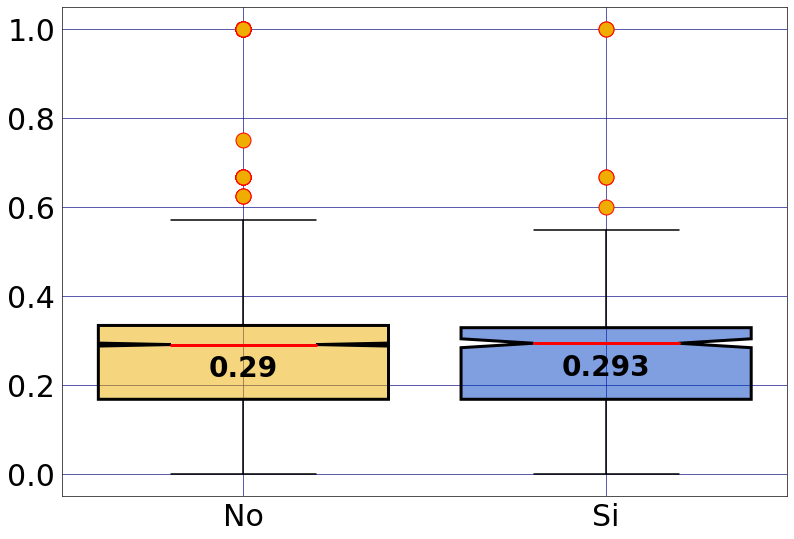

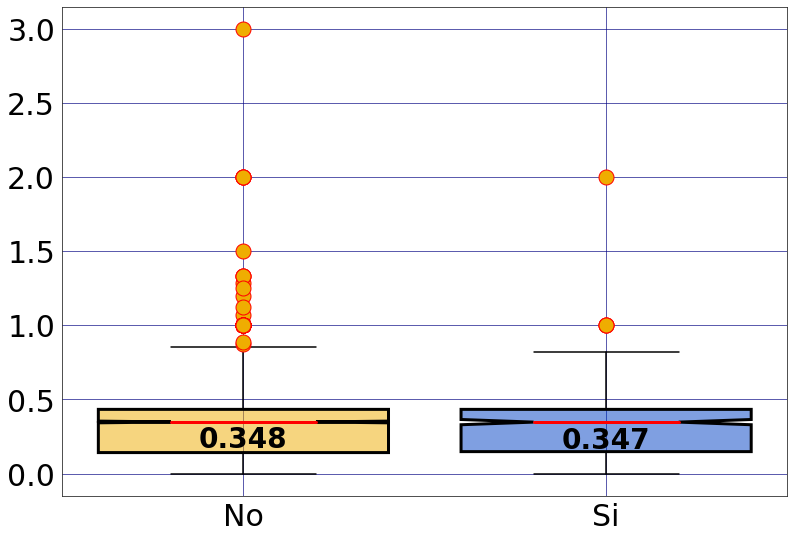

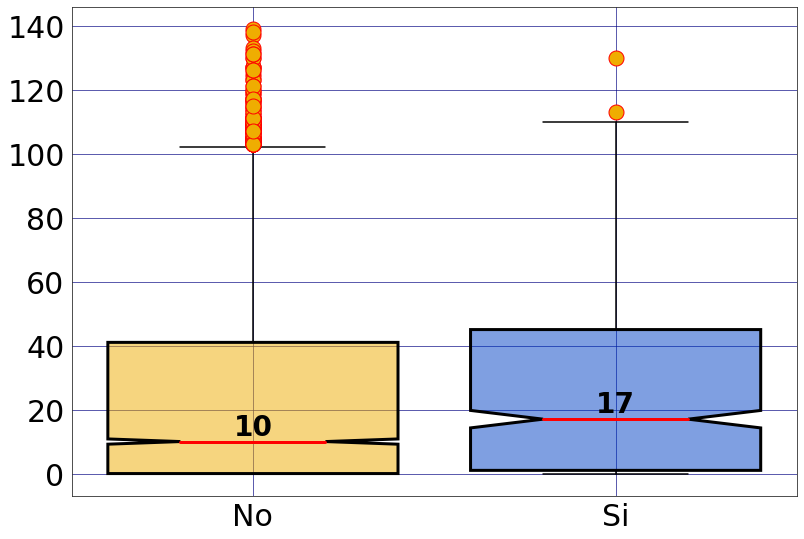

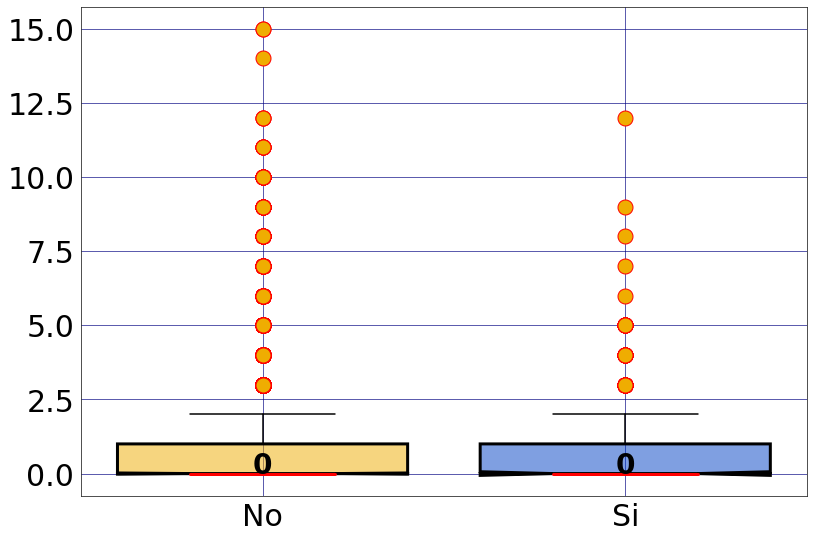

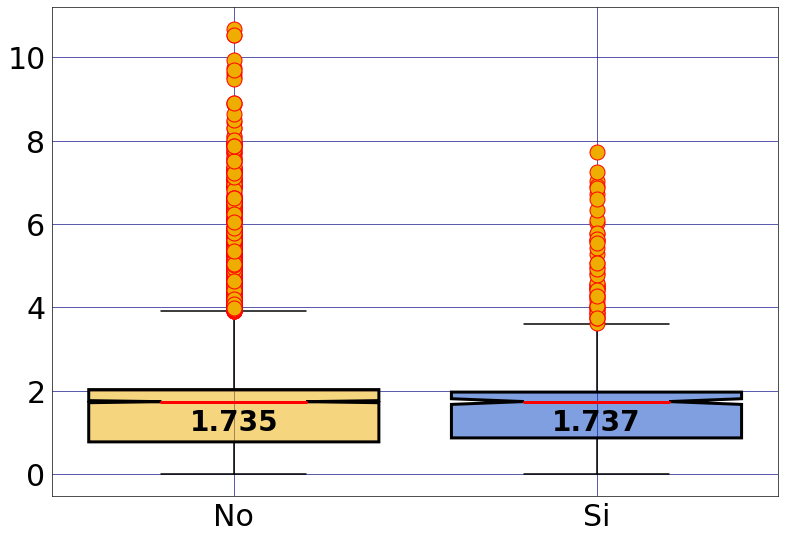

In [105]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'Agente_libre',
                      y = hitter_statistics[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_1.set_ylabel(hitter_labels[i],
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['Agente_libre'])[hitter_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[hitter_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*hitter_positions[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/boxplot_hitter_" + str(hitter_labels[i]).lower() + ".pdf",
                format = "pdf")

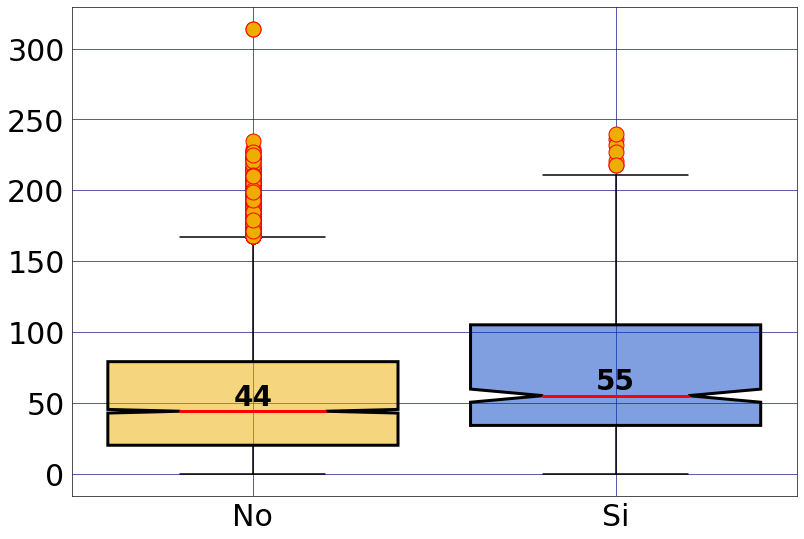

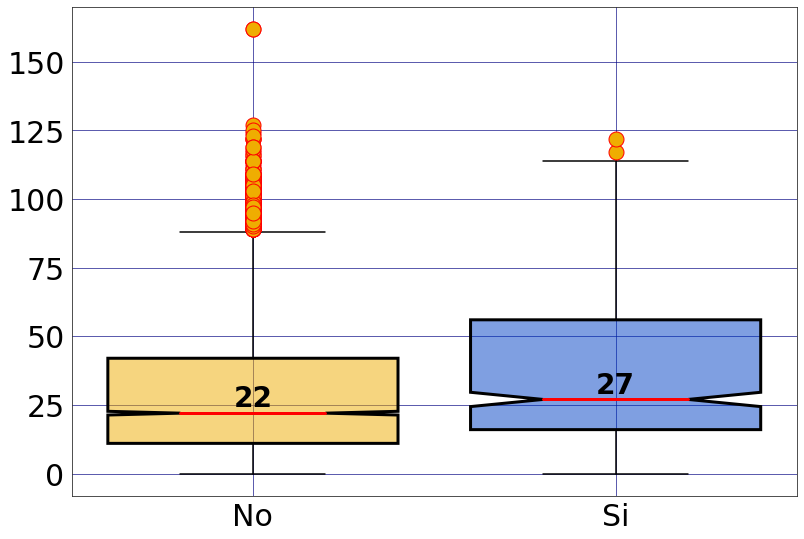

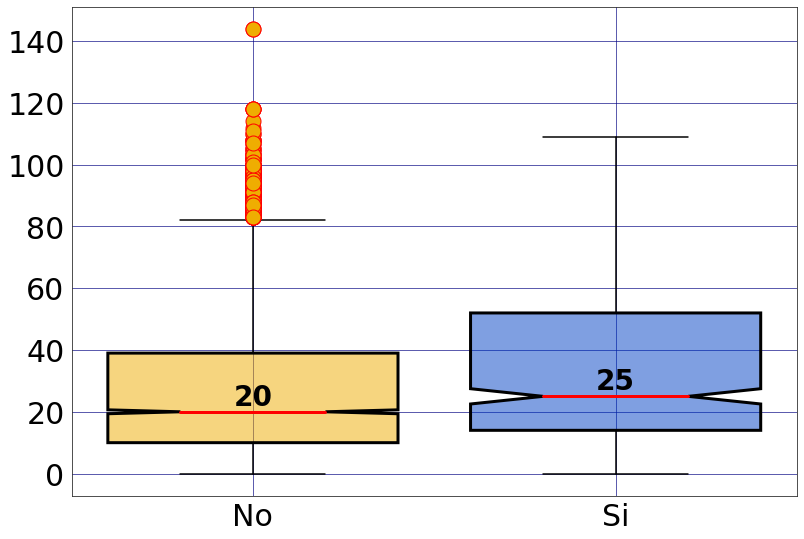

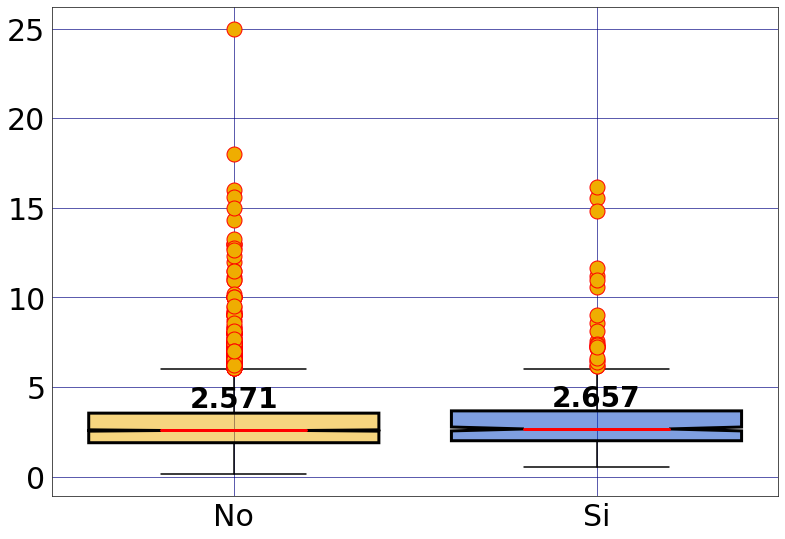

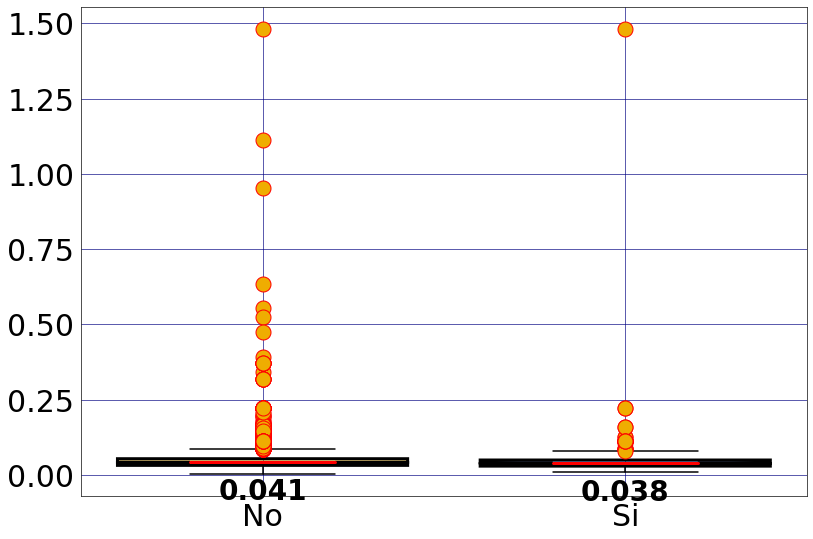

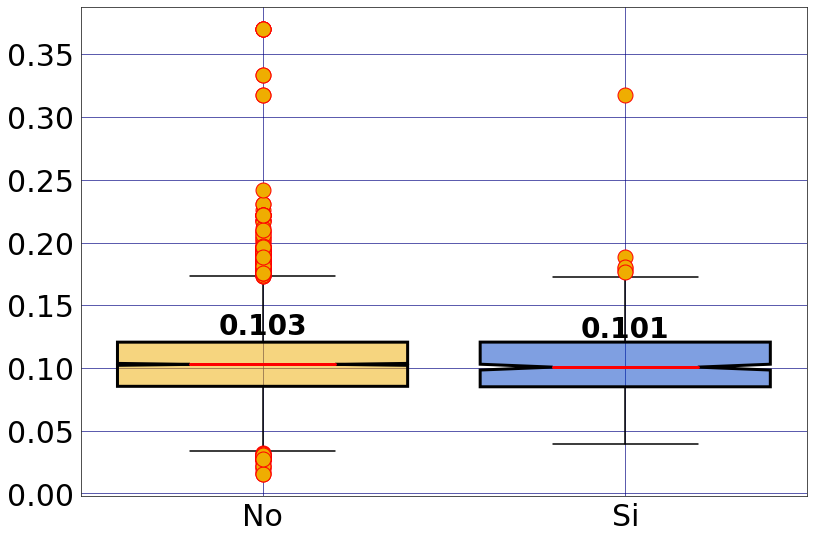

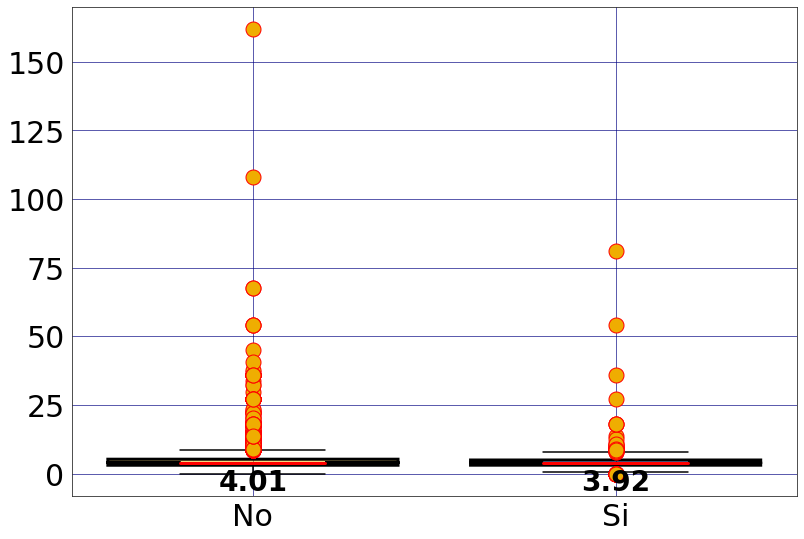

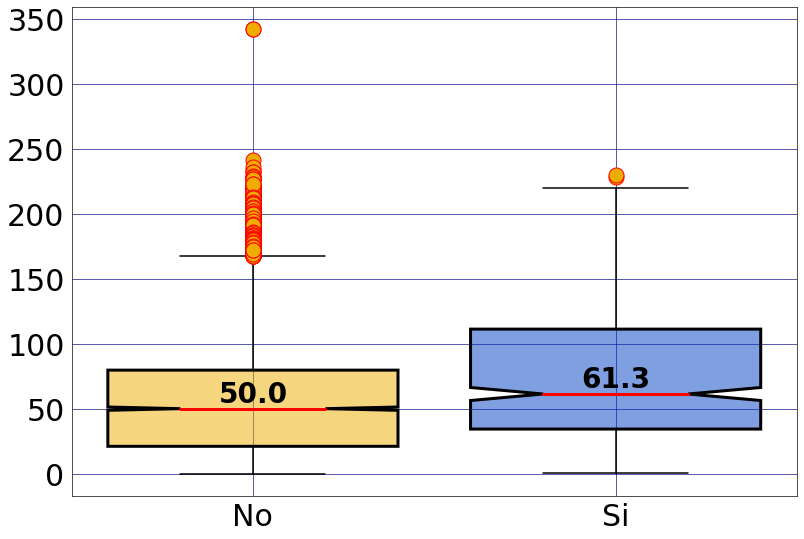

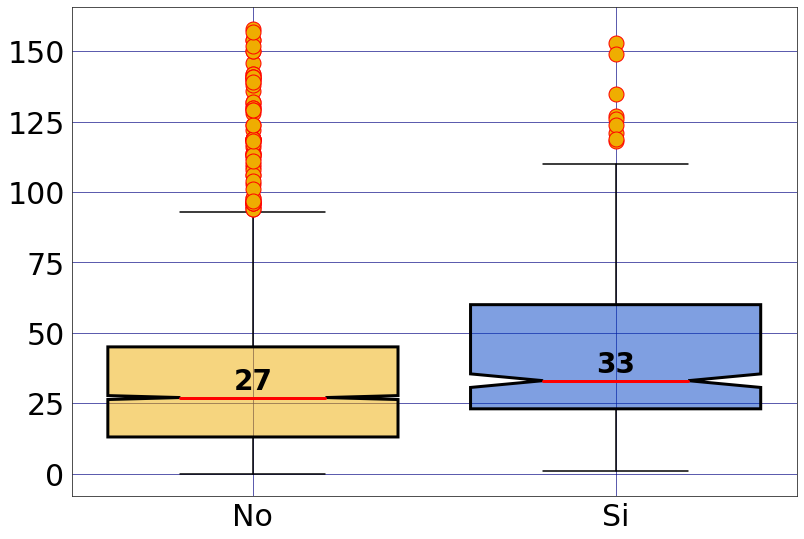

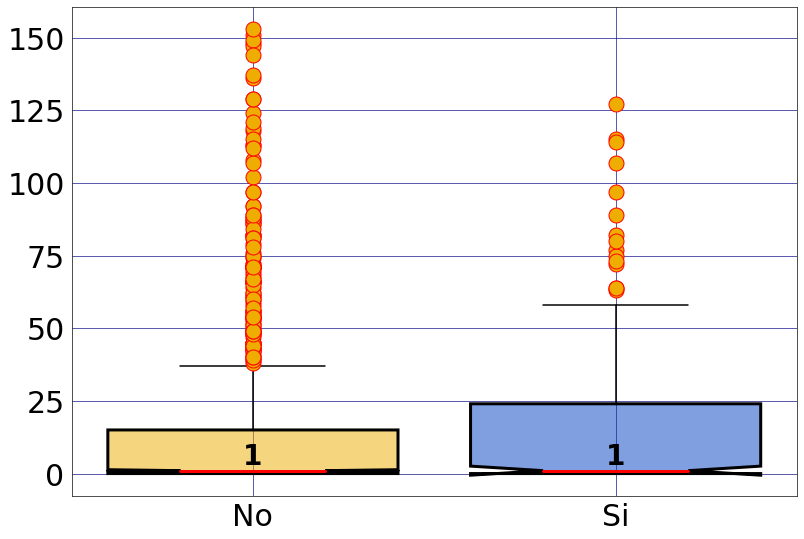

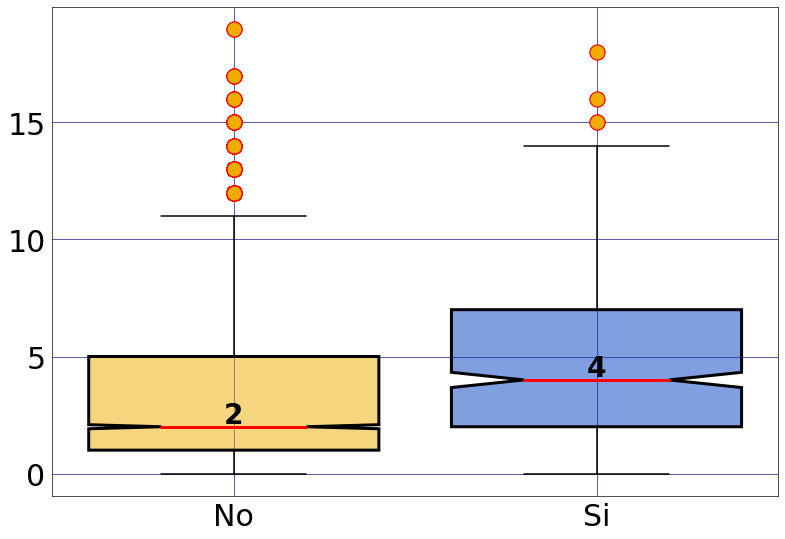

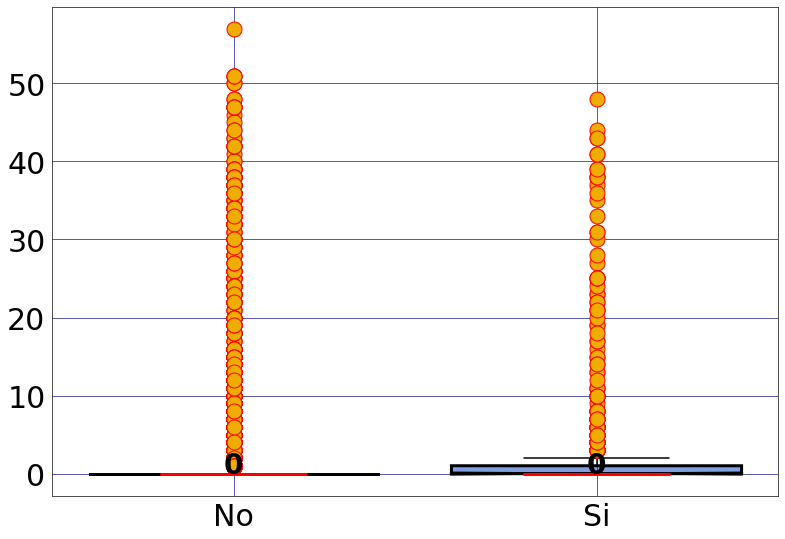

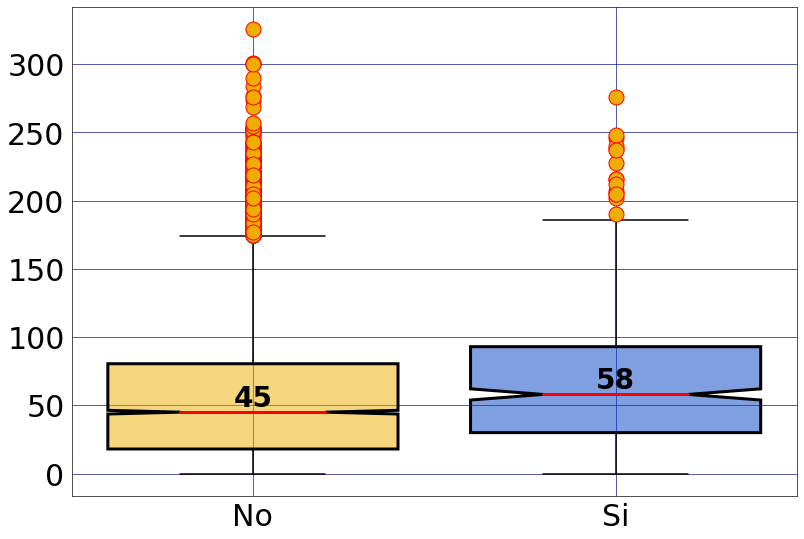

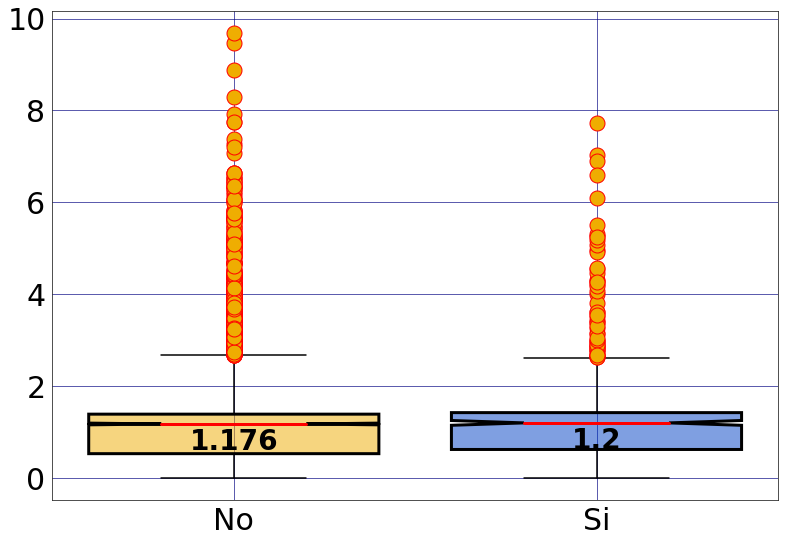

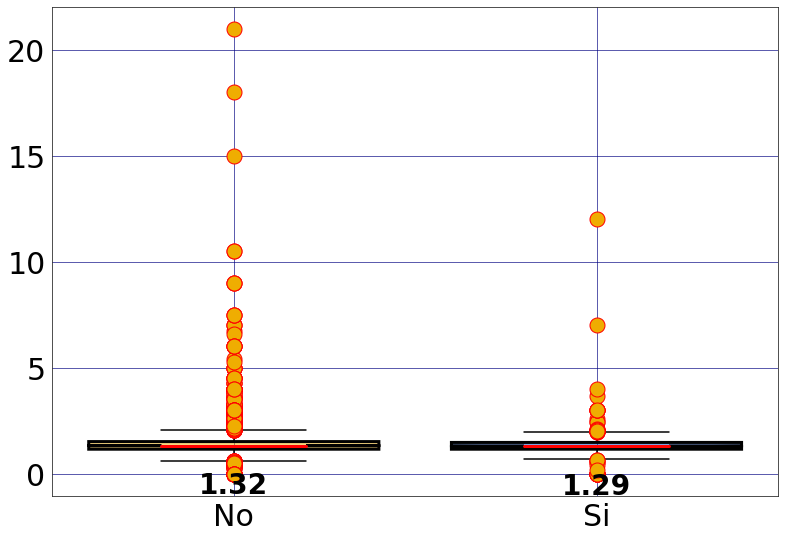

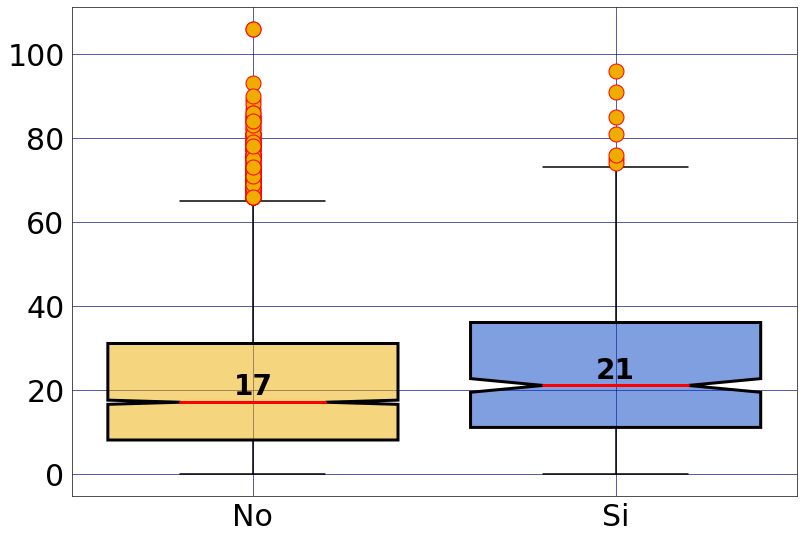

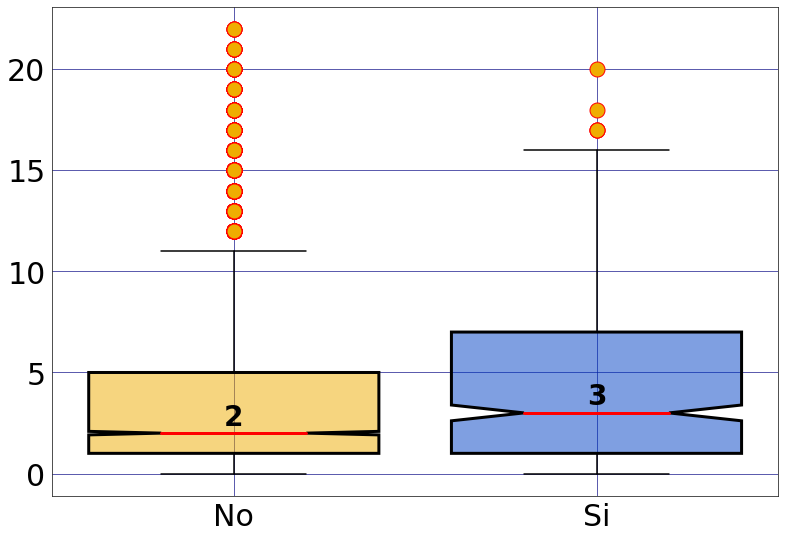

In [106]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'Agente_libre',
                      y = pitcher_statistics[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_1.set_ylabel(pitcher_labels[i],
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['Agente_libre'])[pitcher_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[pitcher_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*pitcher_positions[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_" + str(pitcher_labels[i]).lower() + ".pdf",
                format = "pdf")

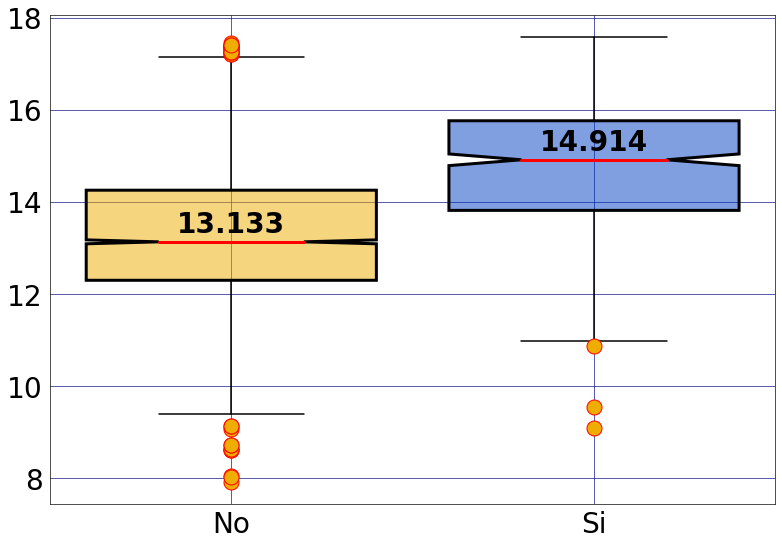

In [107]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (13,9))

g_1 = sns.boxplot(x = 'Agente_libre',
                  y = 'ln_Sueldo_ajustado',
                  data = df_panel_pitcher, 
                  notch = True, 
                  **kws_1)
g_1.set_ylabel('ln(Sueldo ajustado)',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')
g_1.set_xlabel('Agentes libres',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')
g_1.tick_params(labelsize = 28,
                labelcolor = 'black')
g_1.set(xlabel = None)
g_1.set(ylabel = None)
g_1.grid(color = 'navy',
         linestyle = '-',
         alpha = 0.8)

# Cambiar color del segundo boxplot
mybox = g_1.artists[1]
mybox.set_facecolor((0/255,64/255,196/255,0.5))

medians = df_panel_pitcher.groupby(['Agente_libre'])['ln_Sueldo_ajustado'].median()
medians[0] = round(medians[0], 3)
medians[1] = round(medians[1], 3)
vertical_offset = df_panel_pitcher['ln_Sueldo_ajustado'].median()

for xtick in g_1.get_xticks():
    g_1.text(xtick,
             medians[xtick] + vertical_offset*0.015,
             medians[xtick], 
             horizontalalignment = 'center',
             size = 28,
             color = 'black',
             weight = 'bold')
g_1.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/boxplot_hitter_ln_salario_ajustado.pdf",
            format = "pdf")

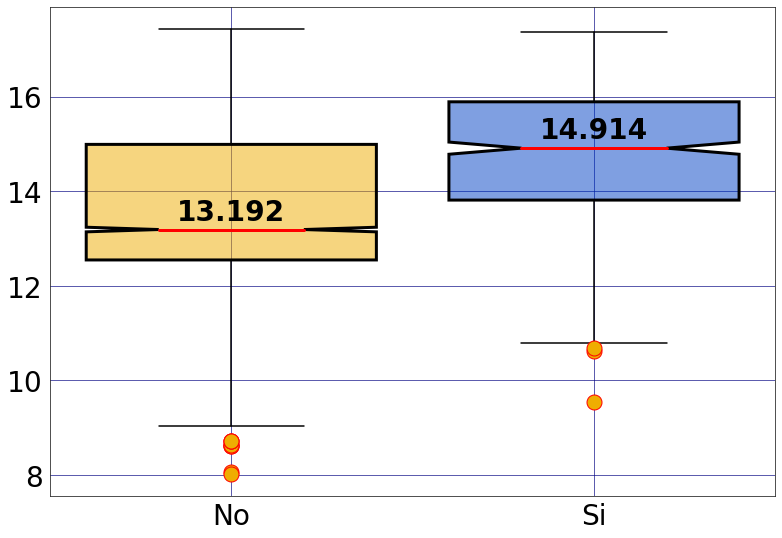

In [108]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (13,9))

g_1 = sns.boxplot(x = 'Agente_libre',
                  y = 'ln_Sueldo_ajustado',
                  data = df_panel_hitter, 
                  notch = True, 
                  **kws_1)
g_1.set_ylabel('ln(Sueldo ajustado)',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')
g_1.set_xlabel('Agentes libres',
               fontsize = 19,
               fontweight = 'bold',
               color = 'black')  
g_1.tick_params(labelsize = 28,
                labelcolor = 'black')
g_1.set(xlabel = None)
g_1.set(ylabel = None)
g_1.grid(color = 'navy',
         linestyle = '-',
         alpha = 0.8)

# Cambiar color del segundo boxplot
mybox = g_1.artists[1]
mybox.set_facecolor((0/255,64/255,196/255,0.5))

medians = df_panel_hitter.groupby(['Agente_libre'])['ln_Sueldo_ajustado'].median()
medians[0] = round(medians[0], 3)
medians[1] = round(medians[1], 3)
vertical_offset = df_panel_hitter['ln_Sueldo_ajustado'].median()

for xtick in g_1.get_xticks():
    g_1.text(xtick,
             medians[xtick] + vertical_offset*0.015,
             medians[xtick], 
             horizontalalignment = 'center',
             size = 28,
             color = 'black',
             weight = 'bold')
g_1.patch.set_facecolor('white')
plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_ln_salario_ajustado.pdf",
            format = "pdf")

## Series de tiempo

Grafiquemos los promedios a lo largo de las temporadas

In [145]:
temporadas = [str(year) for year in range(2012,2023)]

In [146]:
mean_panel_hitter = df_panel_hitter.groupby(['Agente_libre','Anio']).mean()
mean_panel_hitter.reset_index(inplace = True)
mean_panel_pitcher = df_panel_pitcher.groupby(['Agente_libre','Anio']).mean()
mean_panel_pitcher.reset_index(inplace = True)

In [147]:
mean_panel_hitter.head()

Agente_libre  Anio    Altura  Anio_de_agente_libre  Anios_de_contrato  \
0           No  2011  6.167696            629.500000           1.812500   
1           No  2012  6.230911            670.172485           1.880903   
2           No  2013  6.218414            578.452763           1.843137   
3           No  2014  6.149163            676.844857           1.966273   
4           No  2015  6.174470            607.616225           1.957878   

   Antiguedad     At-bats     At-bats_2     Bateos     Bateos_2  ...  \
0    0.750000  158.875000  59558.250000  39.875000  4055.750000  ...   
1    0.907598  193.486653  81789.310062  50.156057  6013.474333  ...   
2    0.966132  192.039216  79455.304813  49.012478  5667.483066  ...   
3    0.922428  192.279933  79621.780776  48.677909  5599.682968  ...   
4    0.962559  186.865835  77684.728549  48.070203  5579.867395  ...   

   Valor_contrato_promedio  Valor_contrato_total  Valor_del_contrato  \
0             3.495968e+06          7.750000e+05        1.066763e+07   
1             3.351608e+06          4.550461e+07        1.321303e+07   
2             3.096370e+06          4.198087e+07        1.243576e+07   
3             3.649021e+06          5.448274e+07        1.531497e+07   
4             3.761696e+06          5.270483e+07        1.645442e+07   

   Victorias       WAR     WAR_2  WS ganadas  ln_Sueldo_ajustado  \
0  96.000000  1.693304  3.857622    0.000000           13.893686   
1  81.517454  2.024894  6.071010    3.675565           14.008256   
2  81.340463  1.956196  5.983755    3.588235           13.631770   
3  80.897133  1.969150  5.774528    3.573356           13.726519   
4  80.377535  1.813244  5.518031    3.882995           13.606254   

   ln_Sueldo_base  ln_Sueldo_regular  
0       14.099887          14.111166  
1       14.052800          14.075870  
2       14.014657          14.034122  
3       14.099021          14.122319  
4       14.051946          14.065318  

[5 rows x 60 columns]

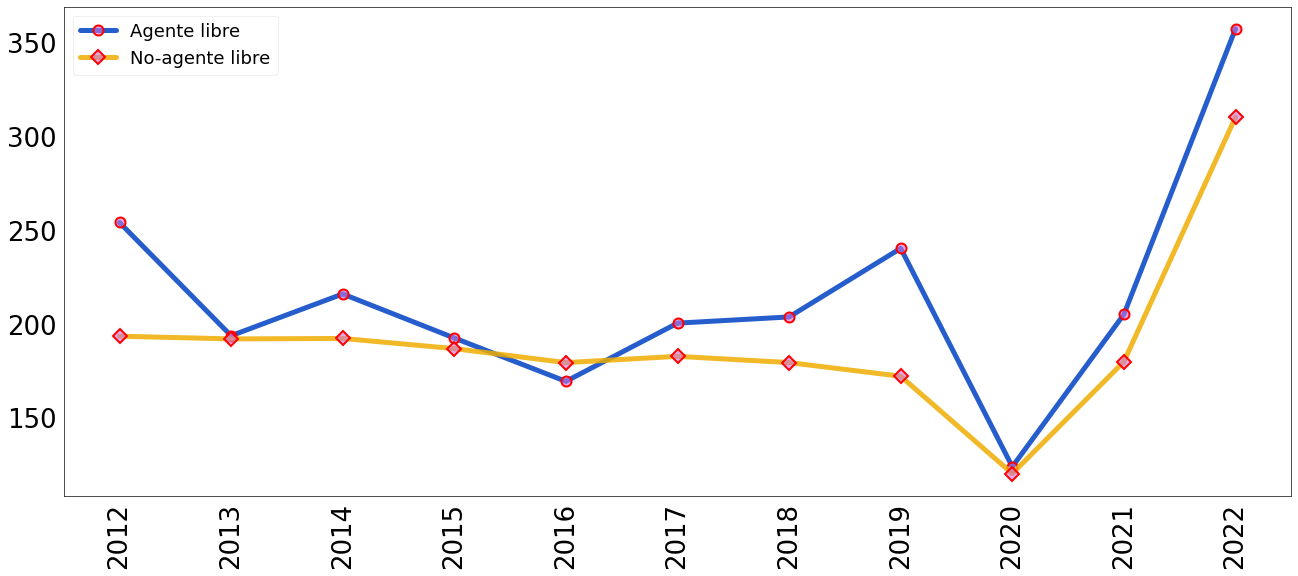

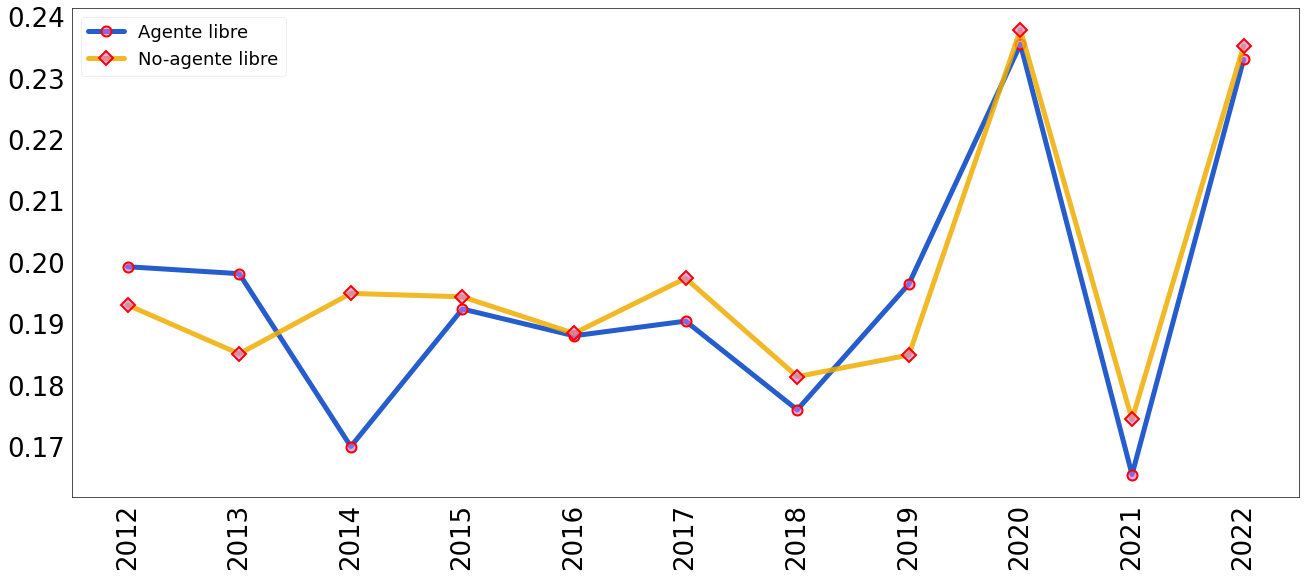

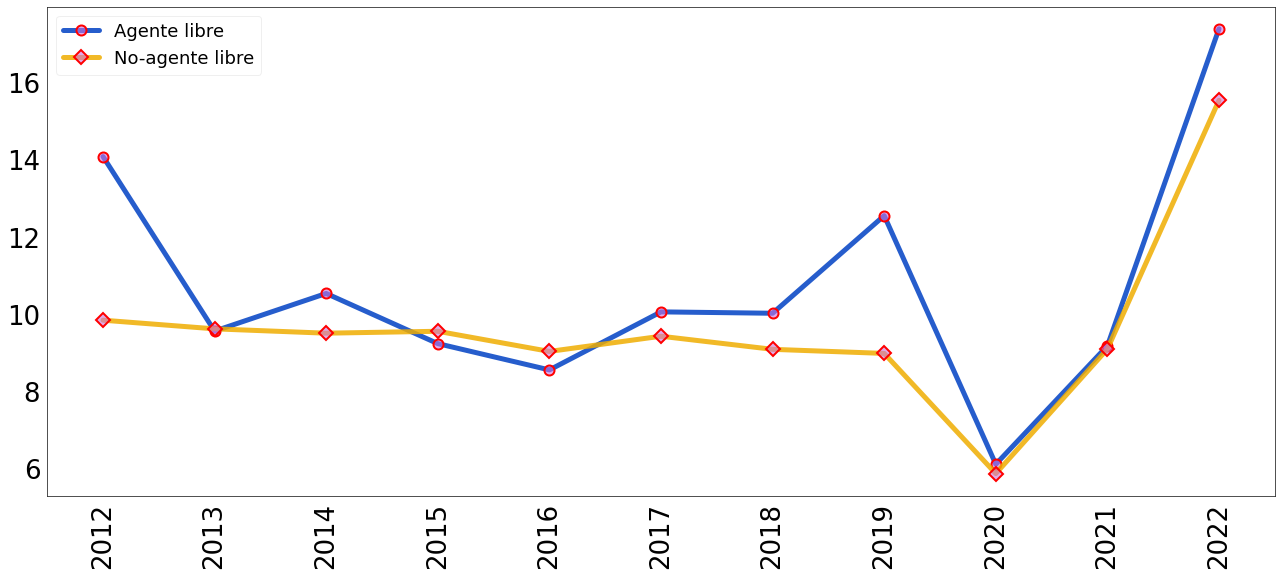

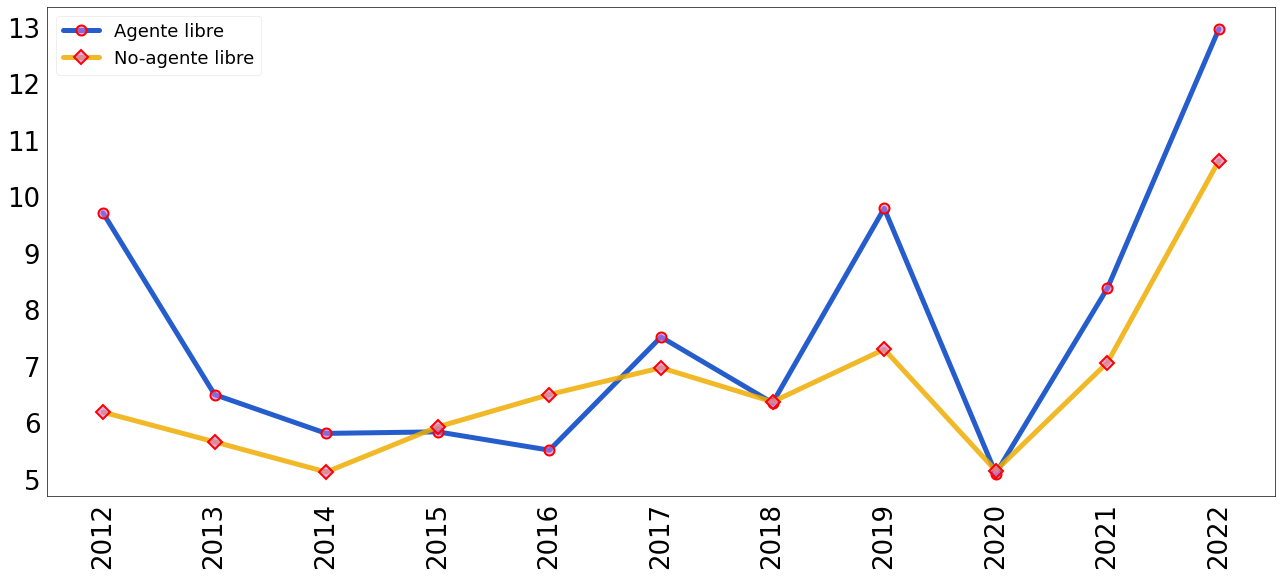

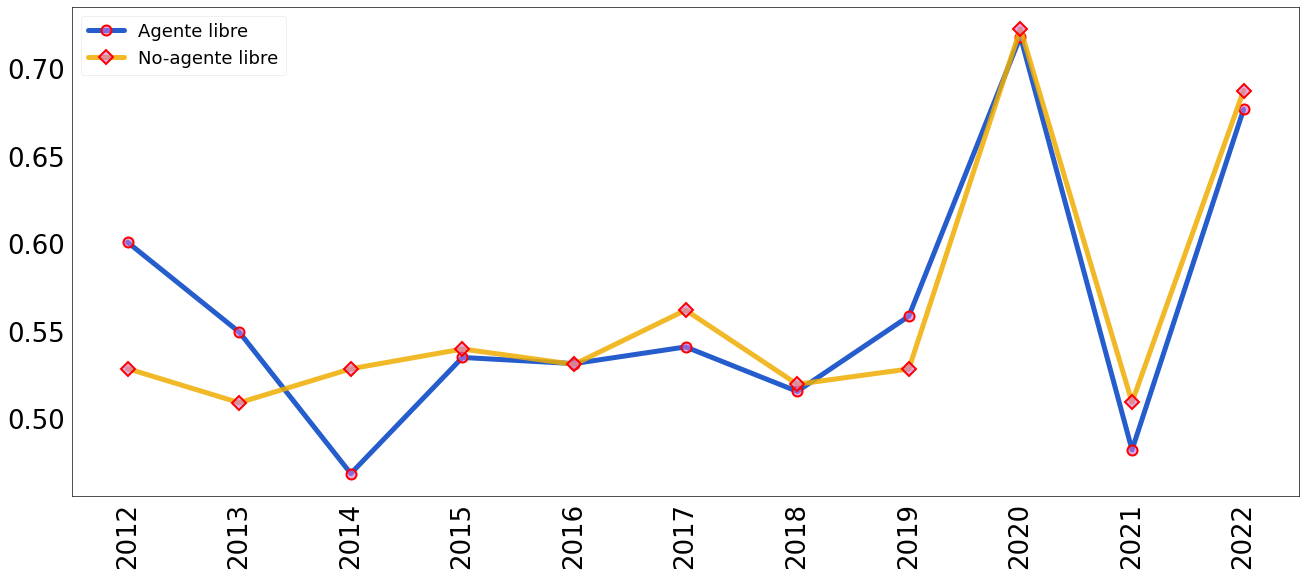

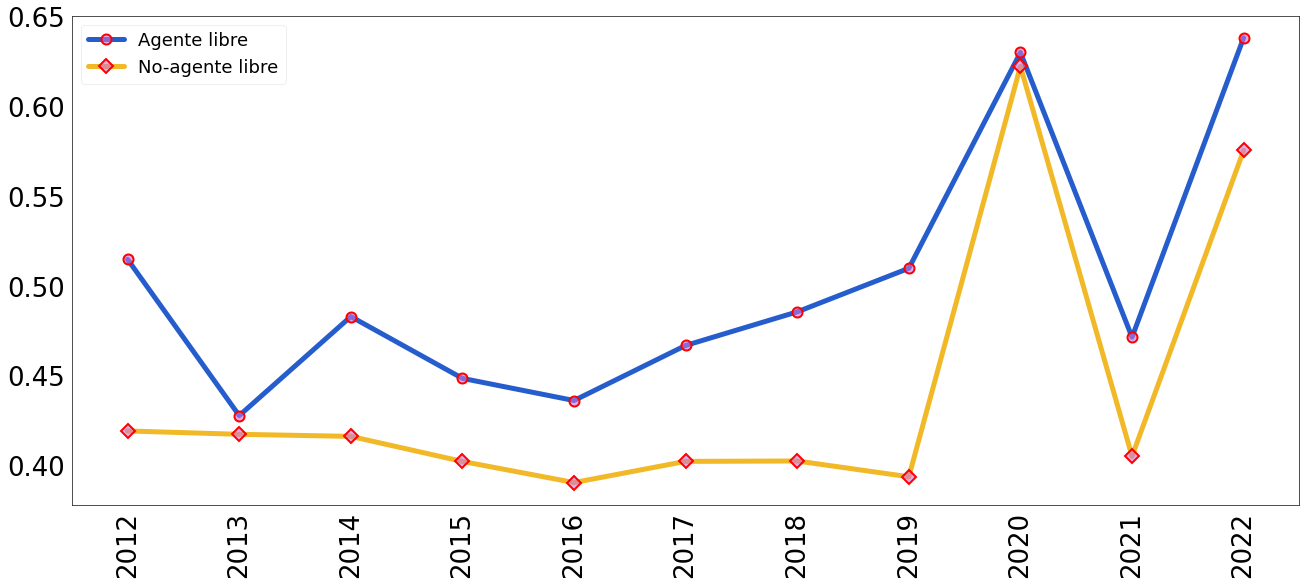

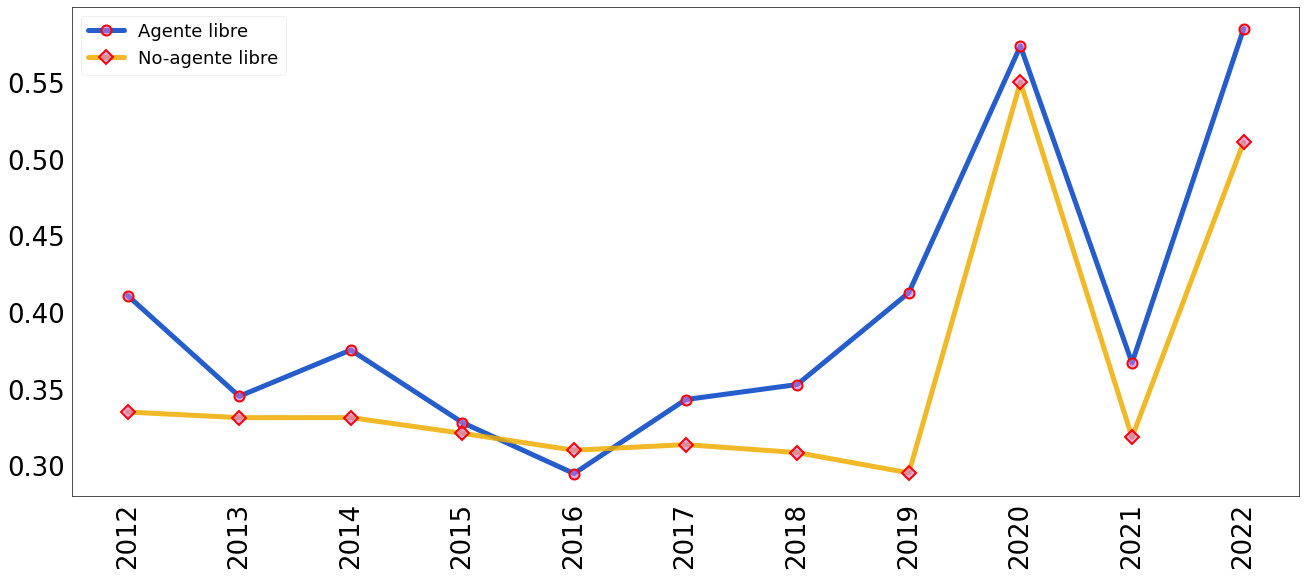

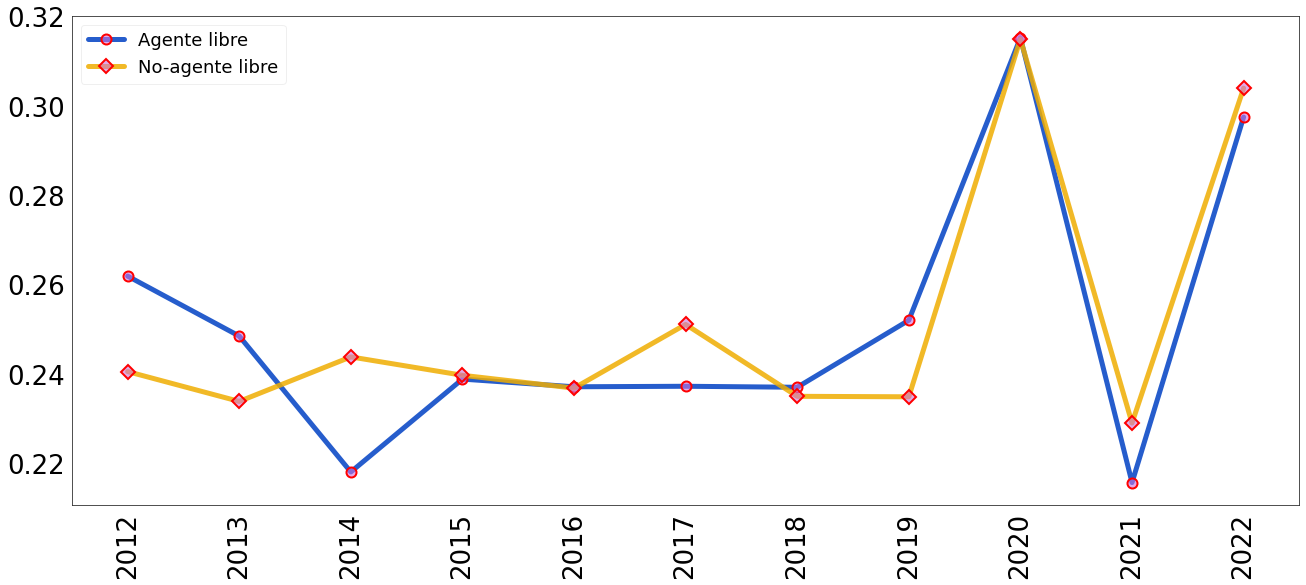

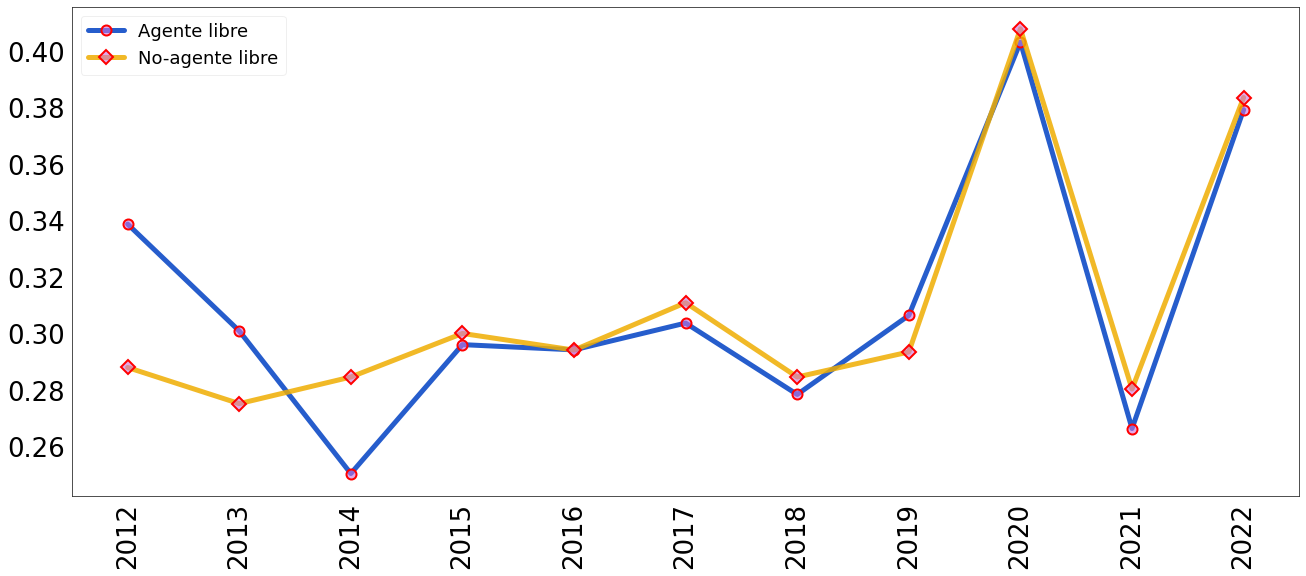

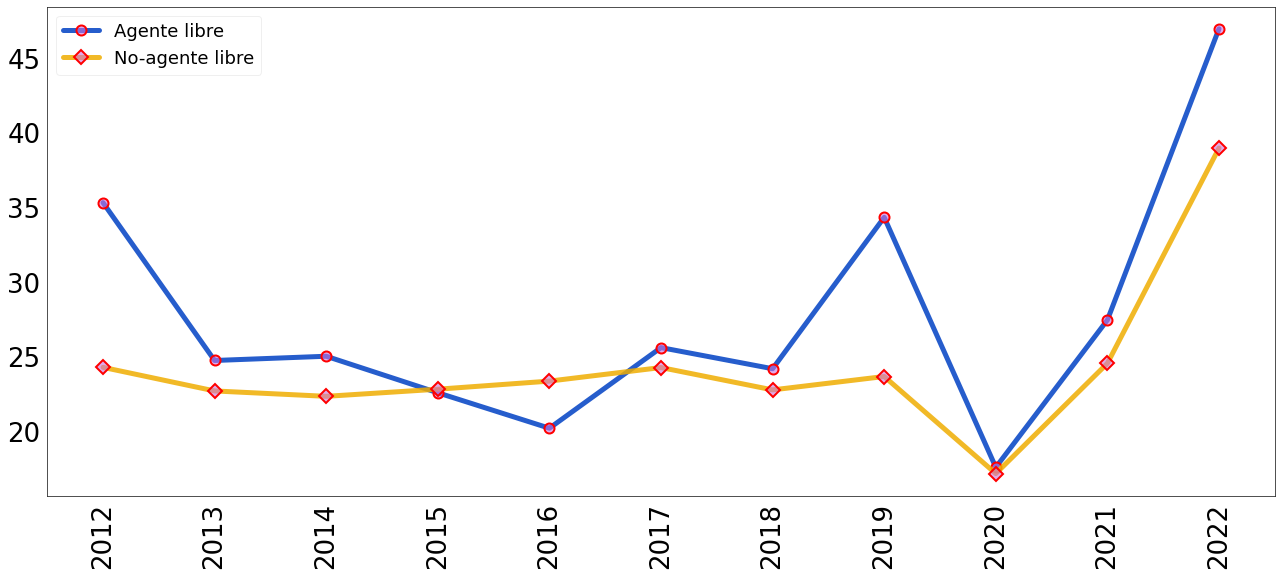

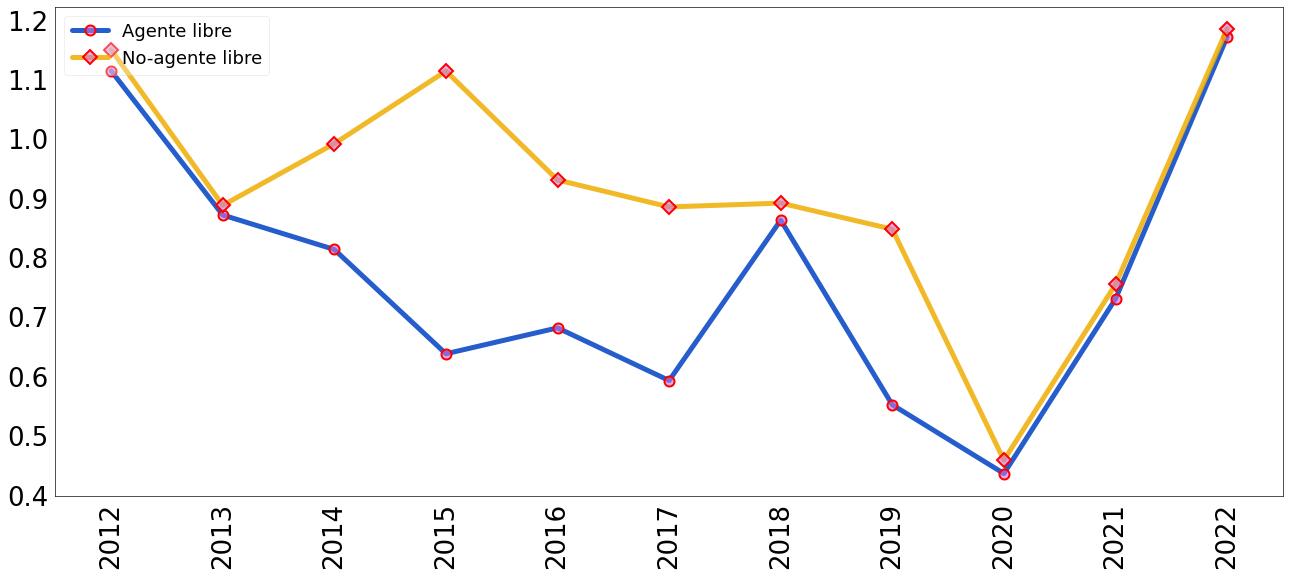

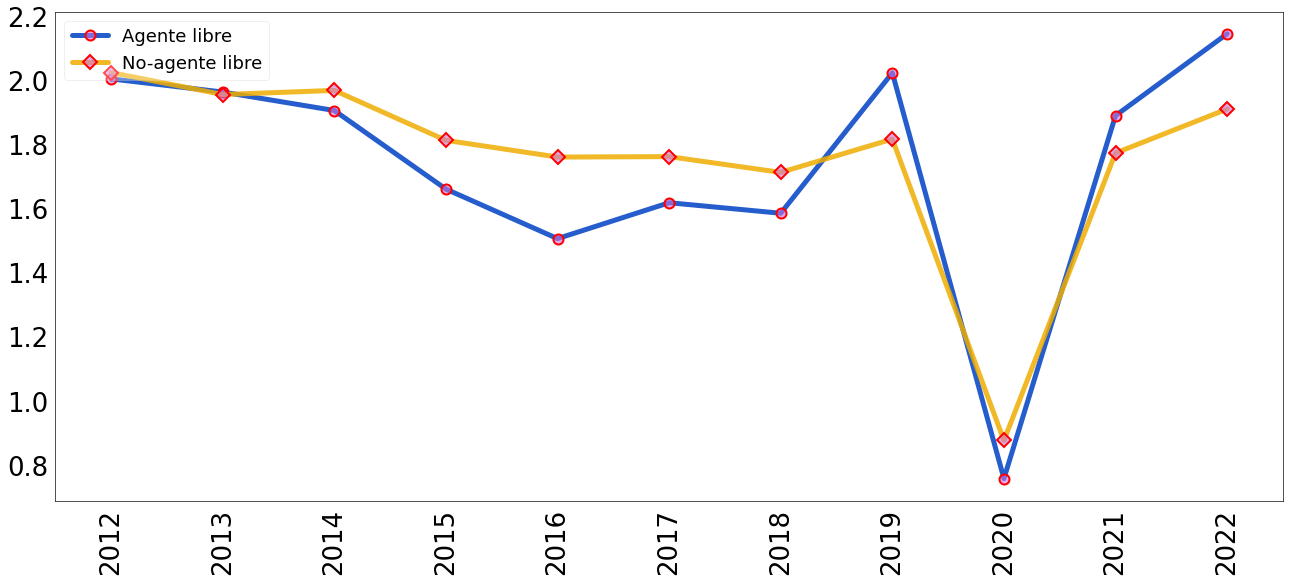

In [191]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    axes.plot(temporadas,
              mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'Si'][hitter_statistics[i]],
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              mean_panel_hitter[(mean_panel_hitter['Agente_libre'] == 'No') & (mean_panel_hitter['Anio'] > 2011)][hitter_statistics[i]],
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(hitter_statistics[i], 
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 26,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'upper left', 
                    labelcolor = 'black',
                    fontsize = 18,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/plot_hitter_" + str(hitter_labels[i]).lower() + ".pdf",
                format = "pdf")

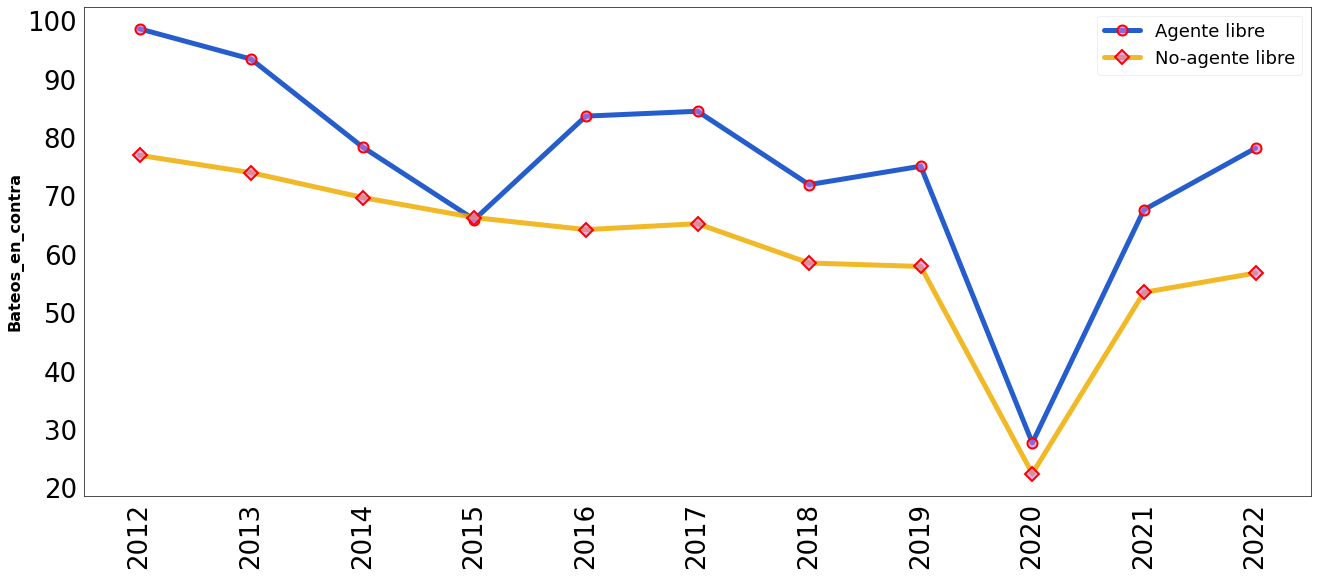

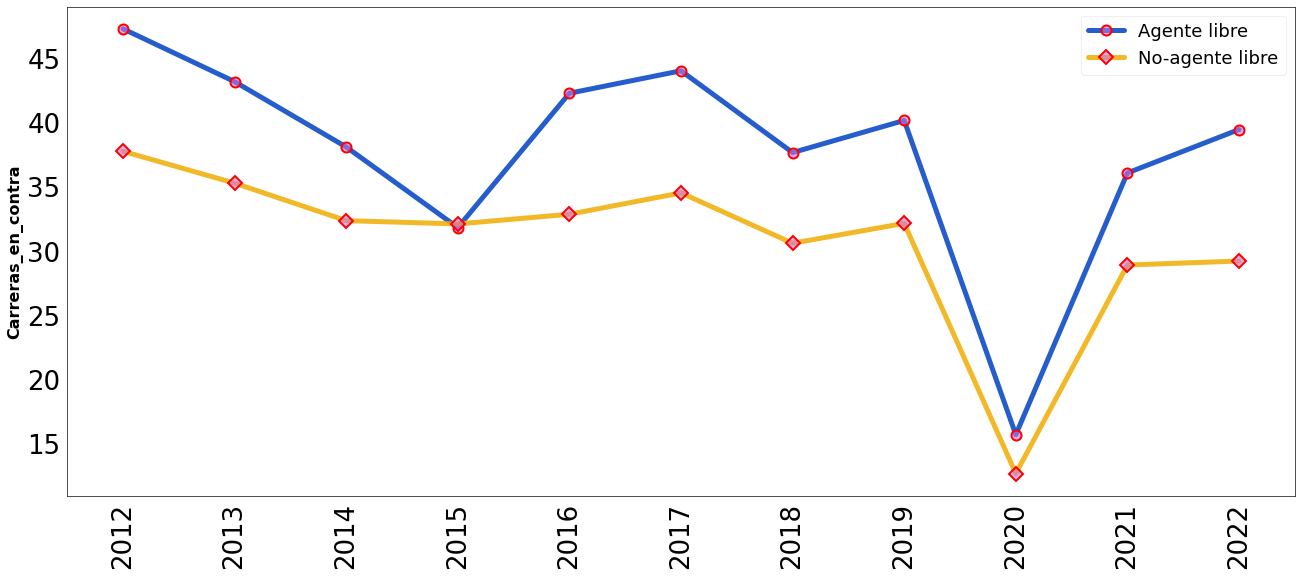

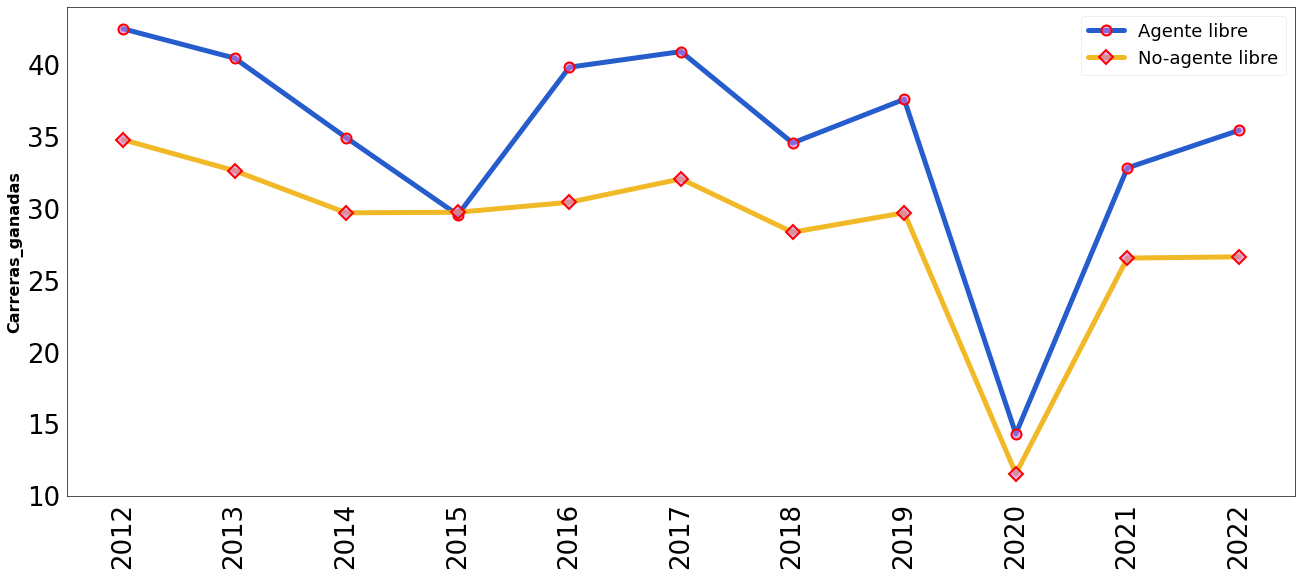

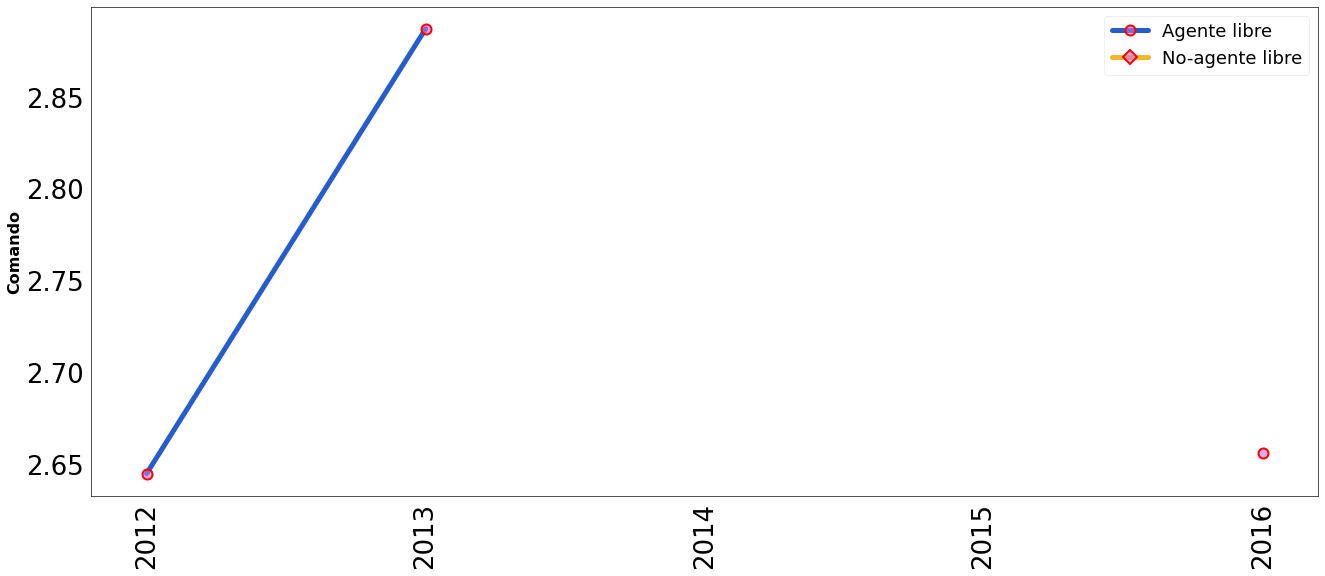

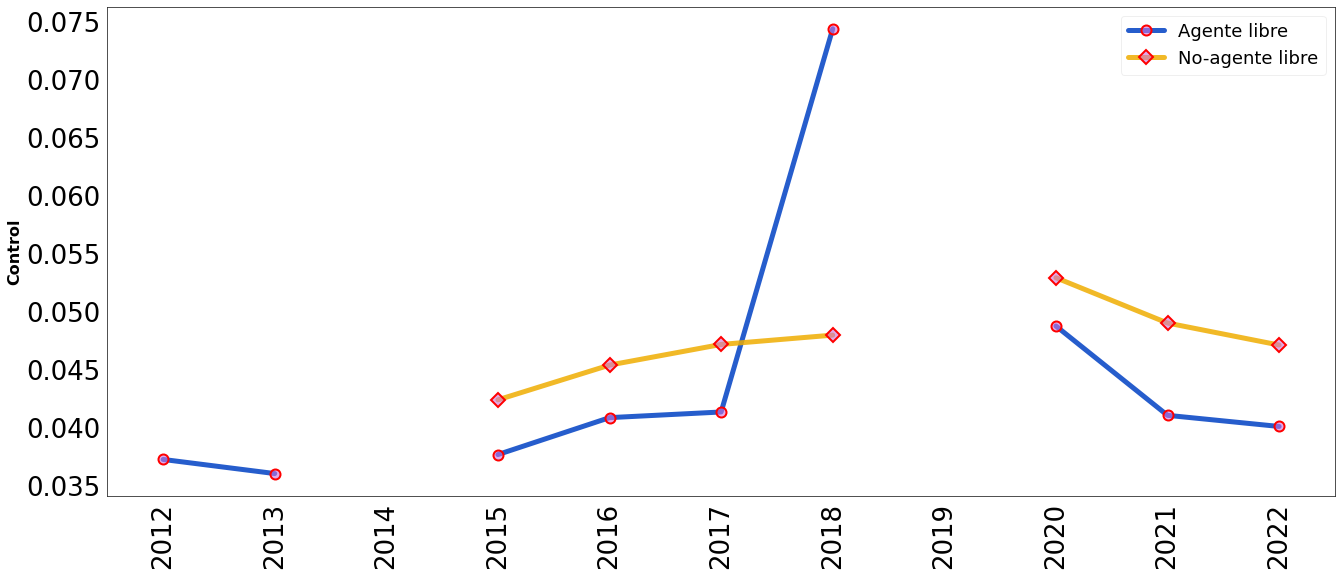

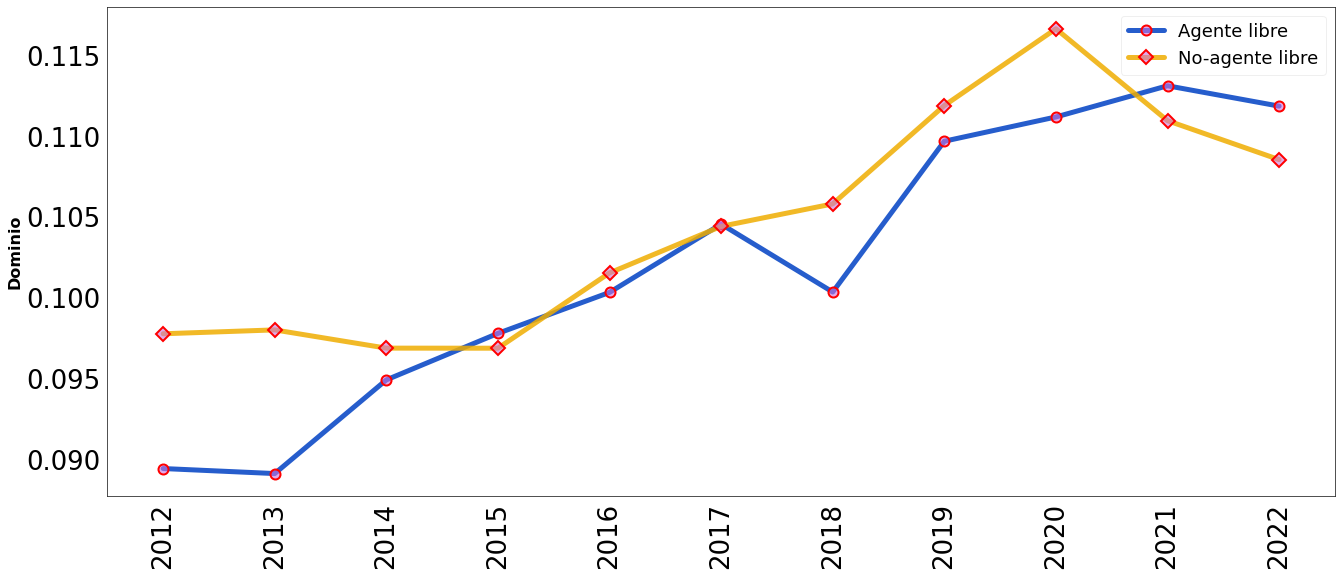

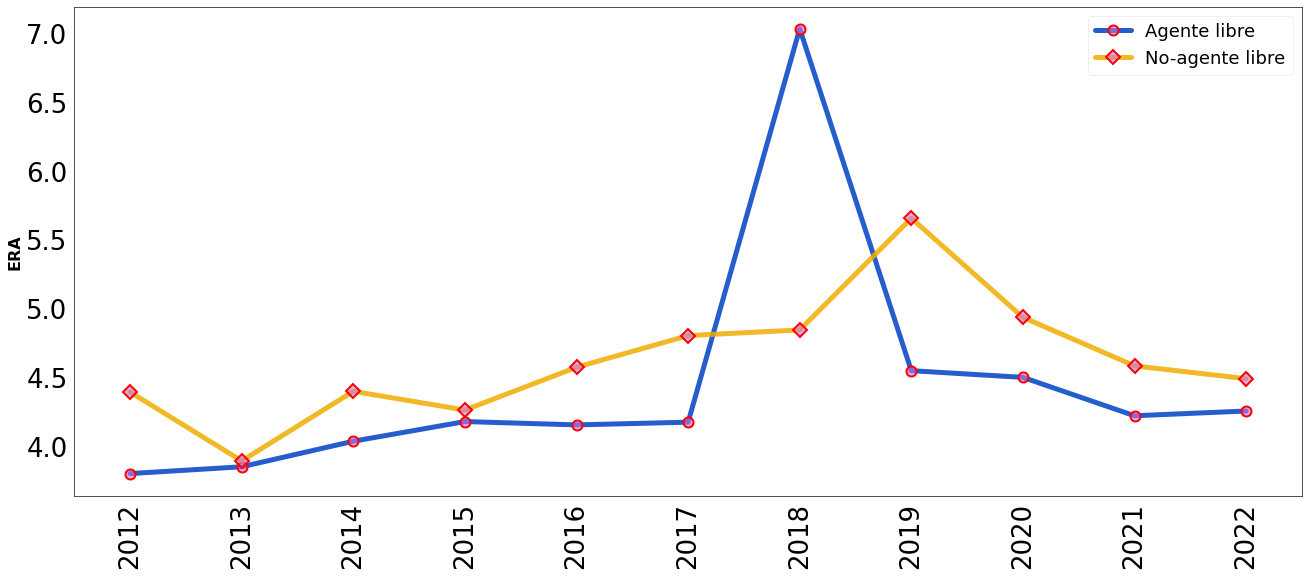

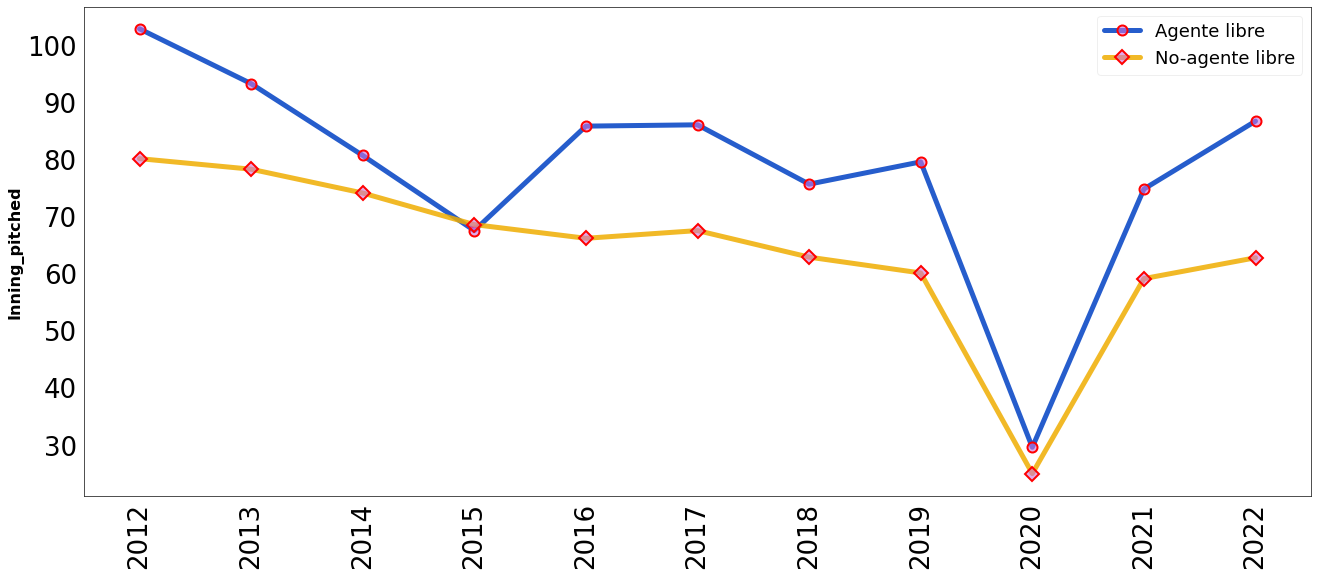

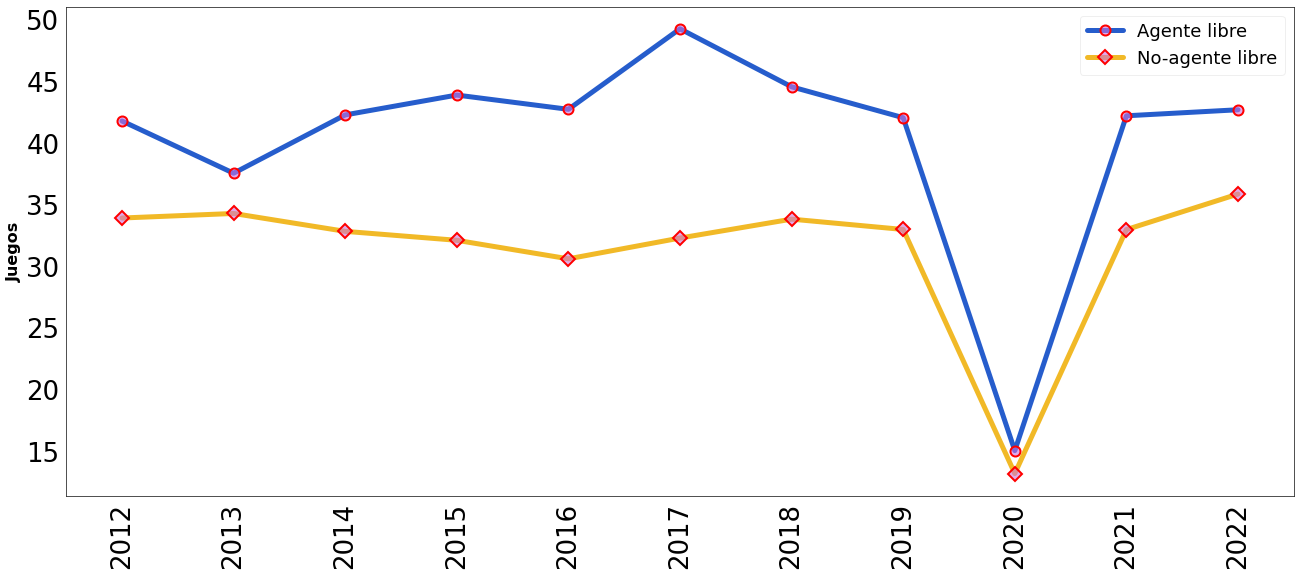

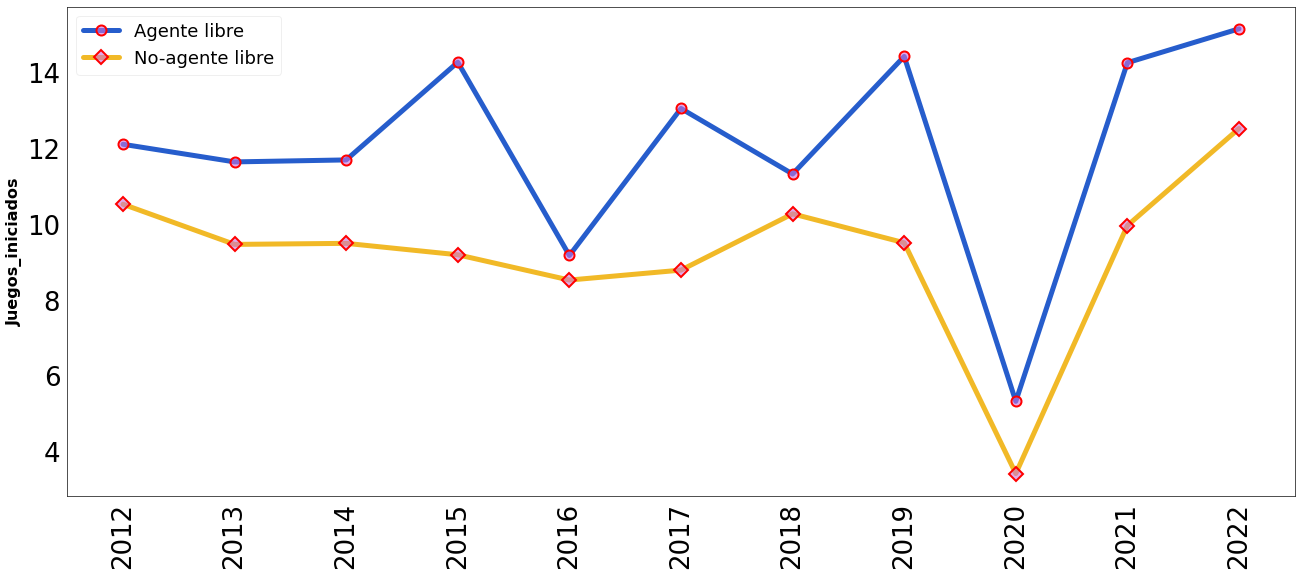

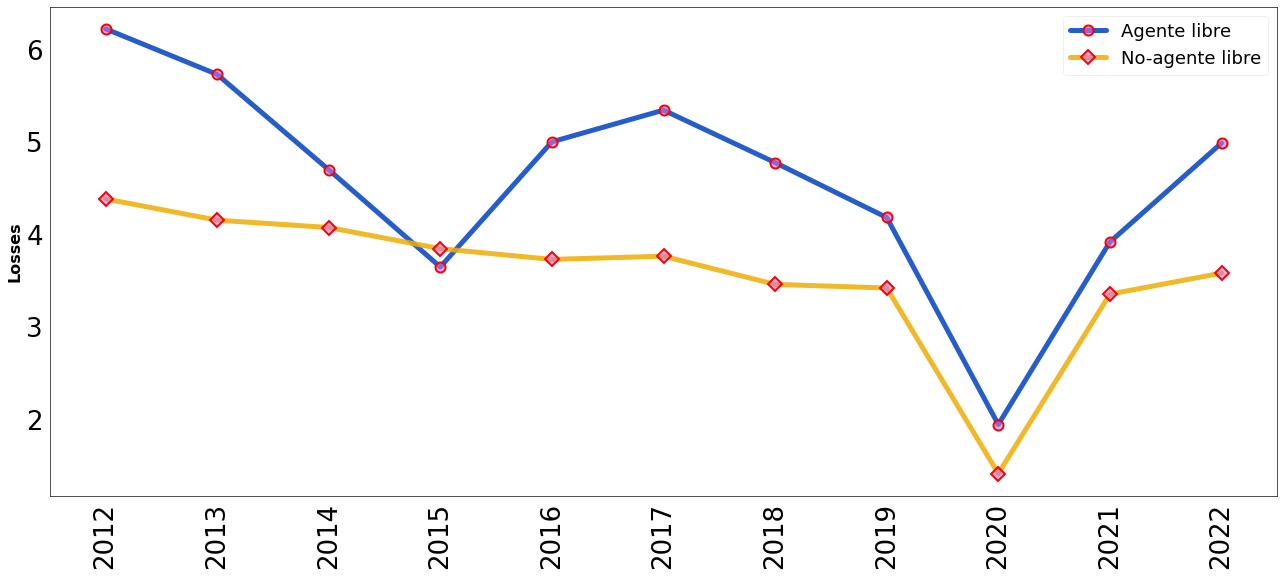

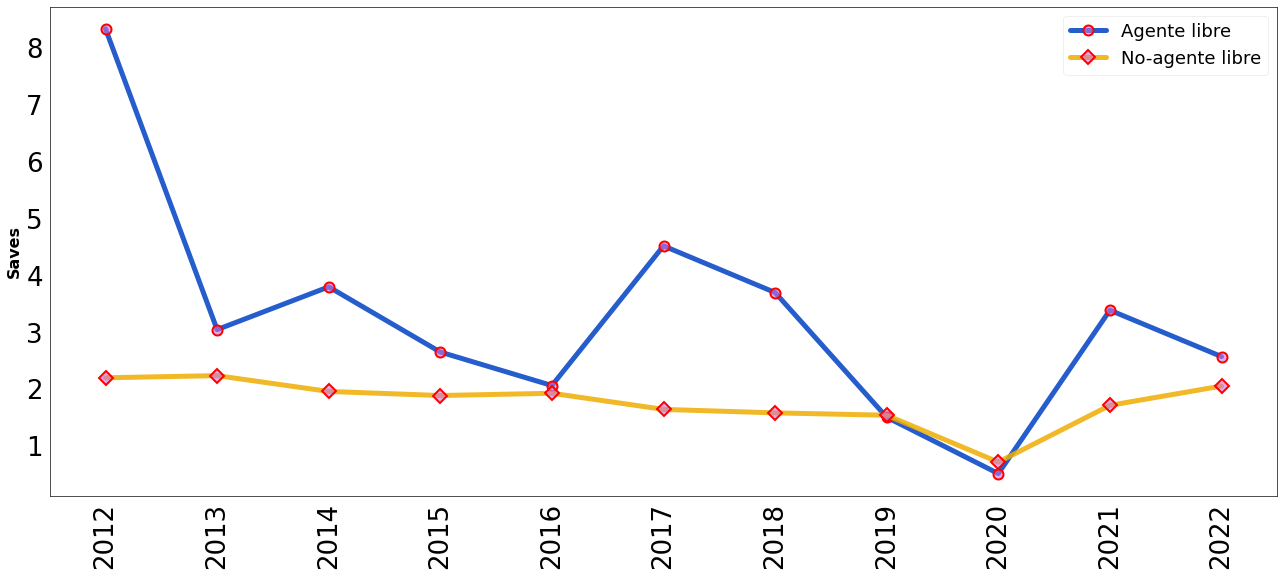

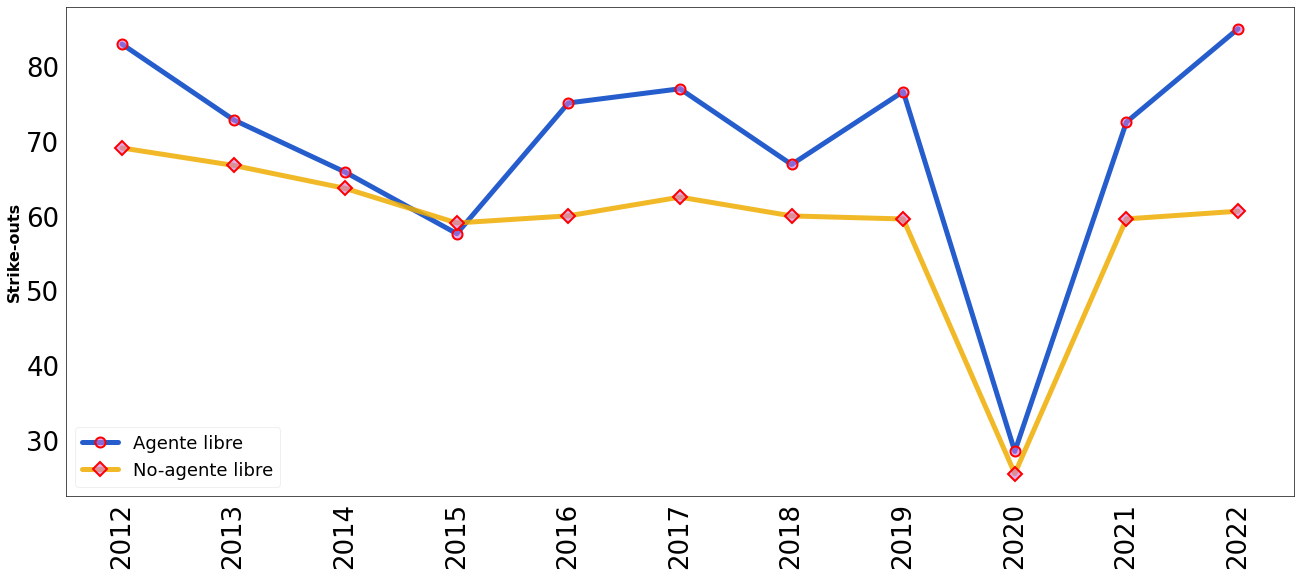

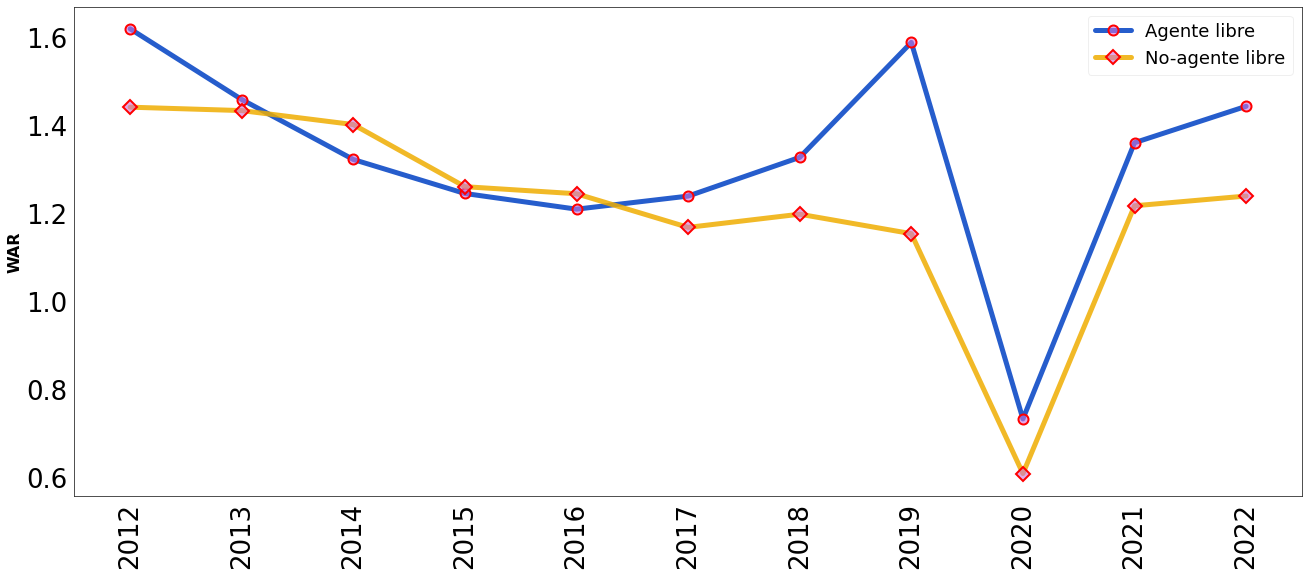

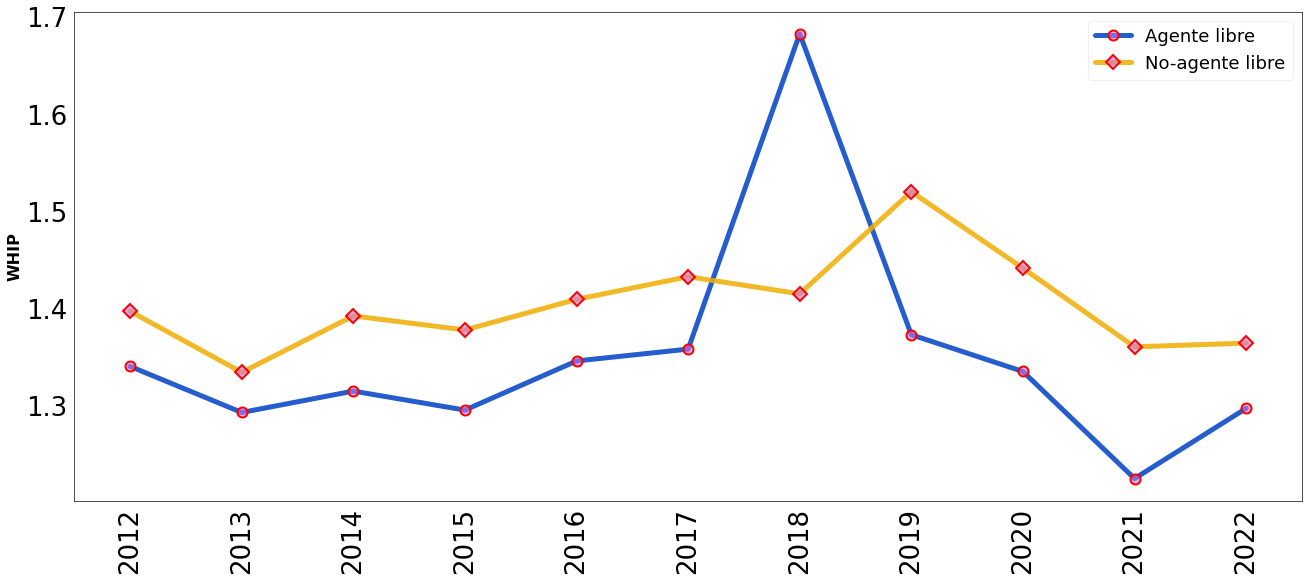

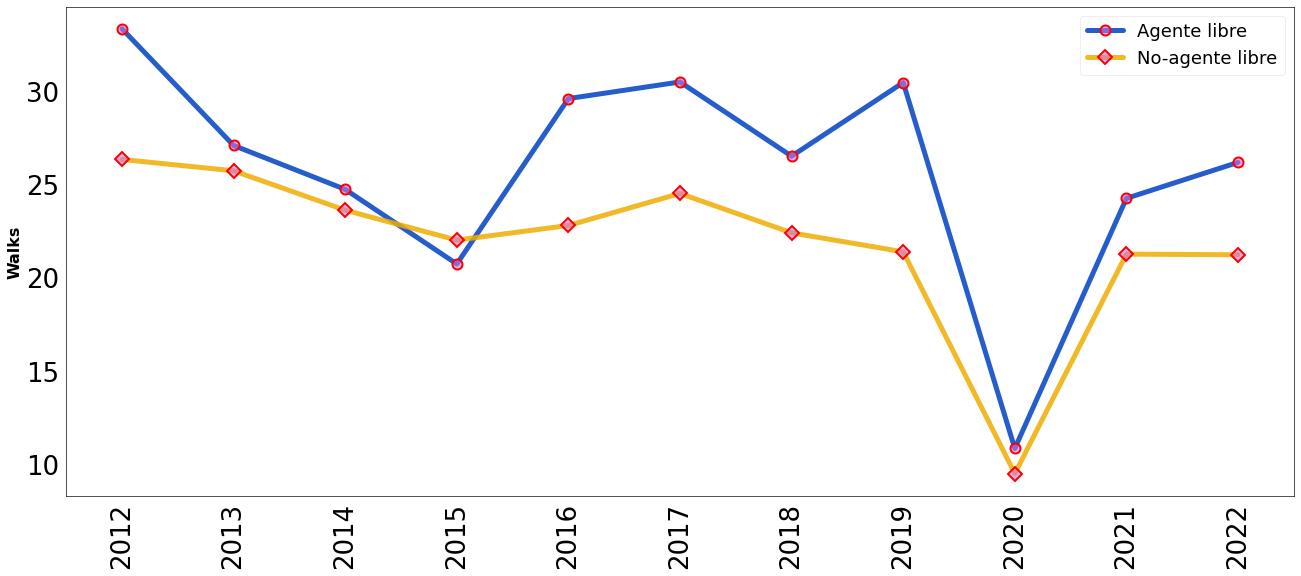

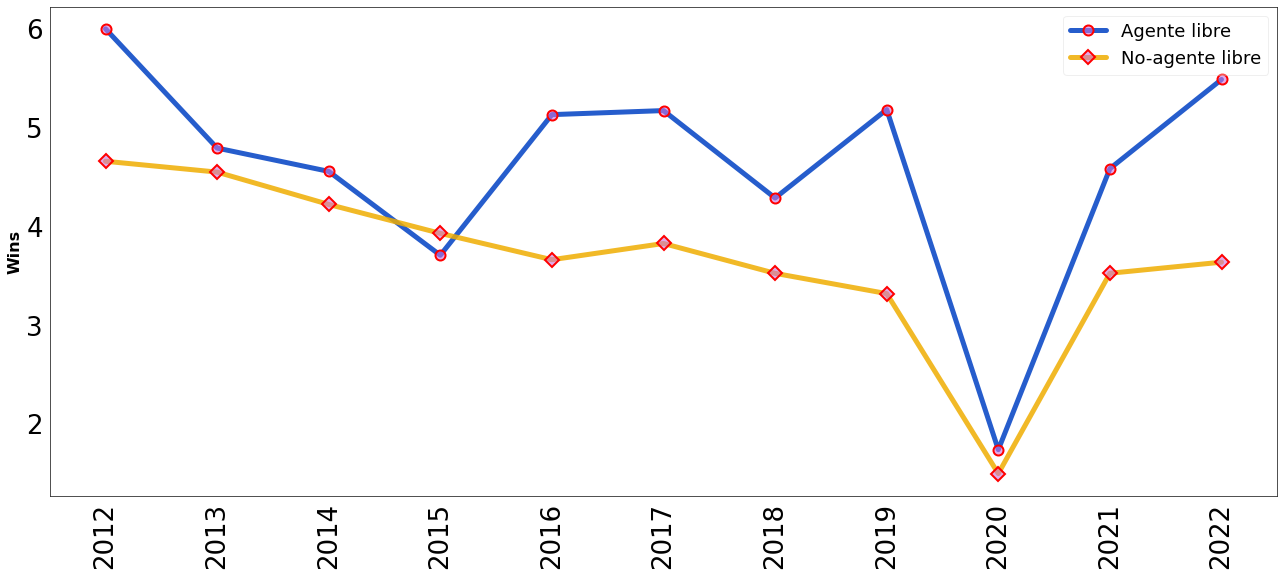

In [194]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    axes.plot(temporadas,
              mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si'][pitcher_statistics[i]],
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              mean_panel_pitcher[(mean_panel_pitcher['Agente_libre'] == 'No') & (mean_panel_pitcher['Anio'] > 2011)][pitcher_statistics[i]],
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(pitcher_statistics[i], 
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 26,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black',
                    fontsize = 18,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    #axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/plot_pitcher_" + str(pitcher_labels[i]).lower() + ".pdf",
                format = "pdf")

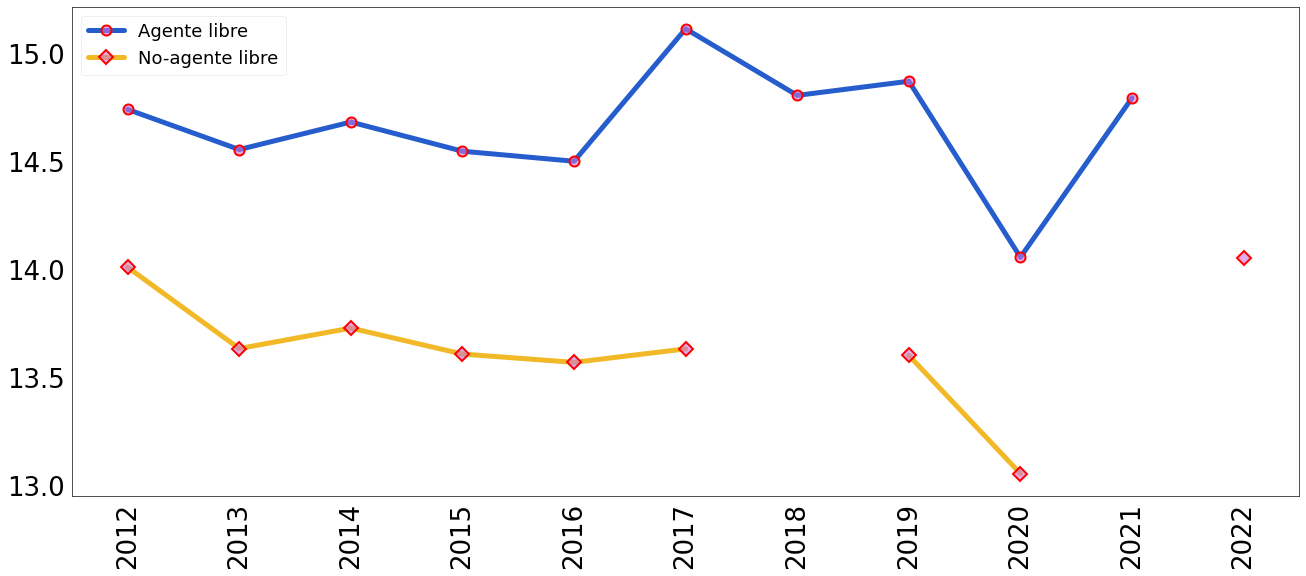

In [195]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (22,9))

axes.plot(temporadas,
          mean_panel_hitter[mean_panel_hitter['Agente_libre'] == 'Si']['ln_Sueldo_ajustado'],
          color = (0/255,64/255,196/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'o',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'Agente libre')
axes.plot(temporadas,
          mean_panel_hitter[(mean_panel_hitter['Agente_libre'] == 'No') & (mean_panel_hitter['Anio'] > 2011)]['ln_Sueldo_ajustado'],
          color = (239/255,173/255,1/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'D',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'No-agente libre')
axes.set_xlabel('Temporadas',
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.set_ylabel('ln(Sueldo regular)', 
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.tick_params(labelsize = 26,
                 labelcolor = 'black')
axes.tick_params(axis = 'x',
                 labelrotation = 90)
legend = plt.legend(loc = 'upper left', 
                labelcolor = 'black',
                fontsize = 18,
                facecolor = 'white',
                framealpha = 0.3,
                fancybox = True,
                frameon = True)
axes.set(xlabel = None)
axes.set(ylabel = None)
axes.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/plot_hitter_ln_sueldo_regular.pdf",
            format = "pdf")

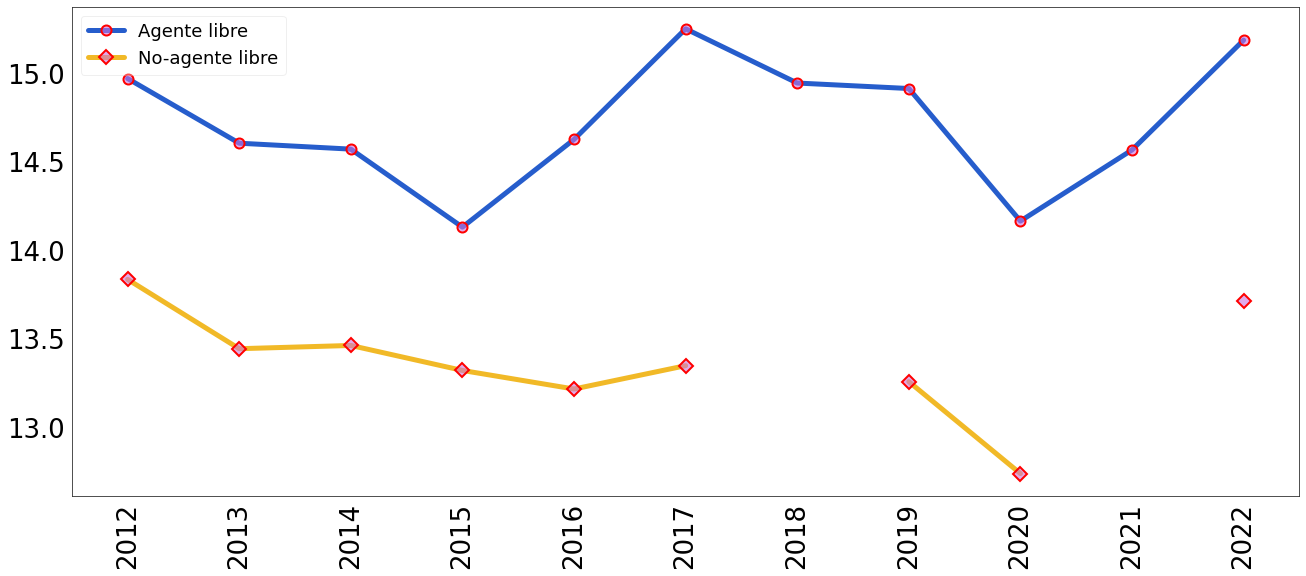

In [196]:
sns.set_style('white')
fig,axes = plt.subplots(figsize = (22,9))

axes.plot(temporadas,
          mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si']['ln_Sueldo_ajustado'],
          color = (0/255,64/255,196/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'o',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'Agente libre')
axes.plot(temporadas,
          mean_panel_pitcher[(mean_panel_pitcher['Agente_libre'] == 'No') & (mean_panel_pitcher['Anio'] > 2011)]['ln_Sueldo_ajustado'],
          color = (239/255,173/255,1/255,0.85),
          markerfacecolor = (205/255,114/255,220/255,0.6),
          marker = 'D',
          markersize = 10,
          markeredgecolor = 'red',
          markeredgewidth = 2,
          linewidth = 5,
          label = 'No-agente libre')
axes.set_xlabel('Temporadas',
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.set_ylabel('ln(Sueldo regular)', 
                fontsize = 16,
                color = 'black',
                fontweight = 'bold')
axes.tick_params(labelsize = 26,
                 labelcolor = 'black')
axes.tick_params(axis = 'x',
                 labelrotation = 90)
legend = plt.legend(loc = 'upper left', 
                labelcolor = 'black',
                fontsize = 18,
                facecolor = 'white',
                framealpha = 0.3,
                fancybox = True,
                frameon = True)
axes.set(xlabel = None)
axes.set(ylabel = None)
axes.patch.set_facecolor('white')

plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/plot_pitcher_ln_sueldo_regular.pdf",
            format = "pdf")

## Diagramas de densidad

Primero, calcularemos los ancho de ventana óptimas

In [206]:
delta = 1.7188 # Ver CT
w_sd = df_panel_hitter['ln_Sueldo_ajustado'].std()
print(w_sd)
q1, q3 = np.percentile(df_panel_hitter['ln_Sueldo_ajustado'], [25,75])
print(q1)
print(q3)
w_iqr_adj = (q3 - q1)/1.349
print(w_iqr_adj)
w_N = df_panel_hitter.shape[0]
print(w_N)
constante = 1.3643
ajuste = min([w_sd,w_iqr_adj])
print(ajuste)
h = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
h

nan
12.62357501424884
15.150511624696614
1.8731924465884173
6814
nan


nan

In [200]:
df_panel_hitter.shape[0]

6814

In [219]:
df_panel_hitter[df_panel_hitter['Sueldo_regular'] > 0]['Sueldo_ajustado']

0       6833333
1        468000
         ...   
6812    1900000
6813     549978
Name: Sueldo_ajustado, Length: 6814, dtype: int64

In [223]:
condicion = (df_panel_hitter['ln_Sueldo_regular'] < 0) or (df_panel_hitter['ln_Sueldo_regular'] == -np.inf)
df_panel_hitter[df_panel_hitter['ln_Sueldo_regular'] == -np.inf]['ln_Sueldo_ajustado']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Bateos_en_contra
Carreras_en_contra
Carreras_ganadas
Comando


ValueError: supplied range of [2.6449527185370663, inf] is not finite

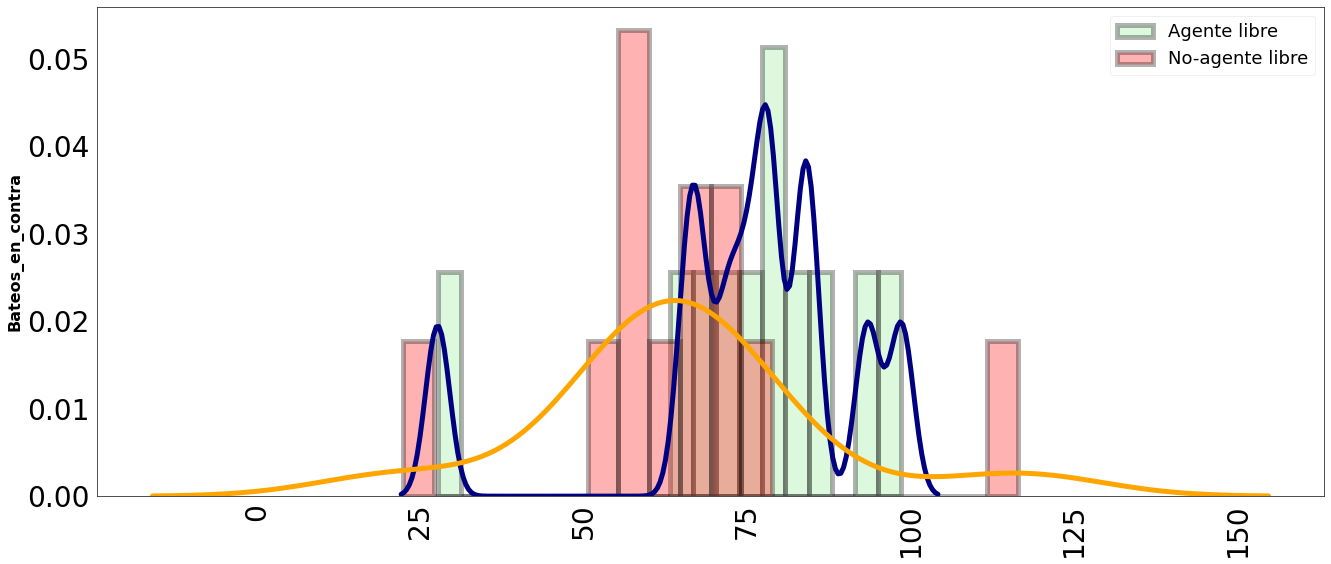

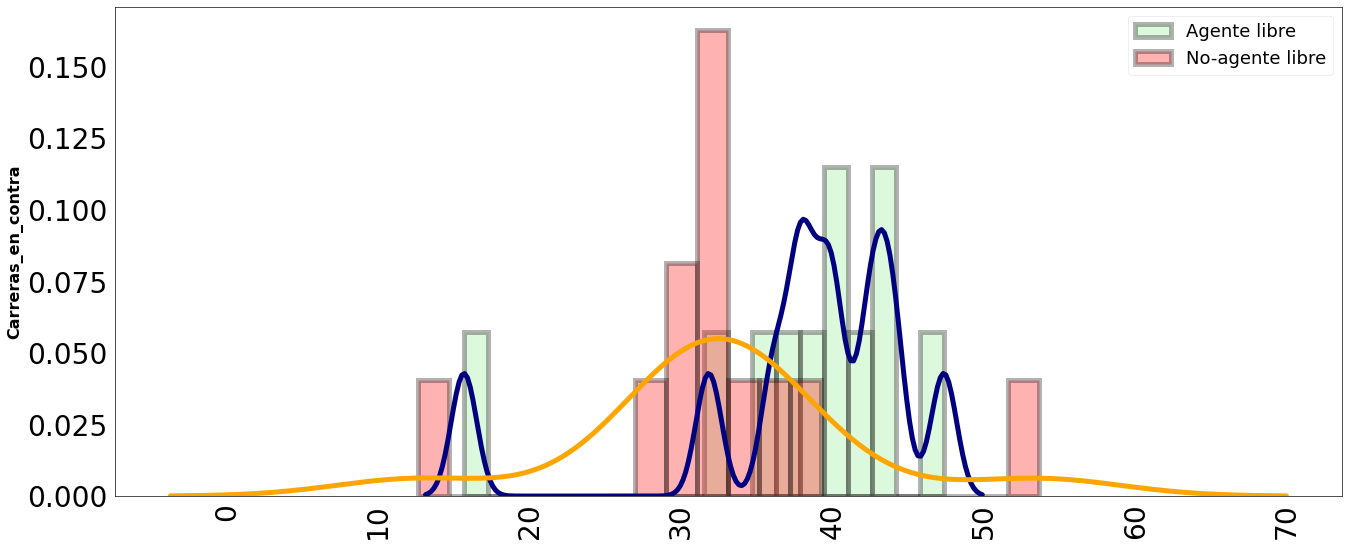

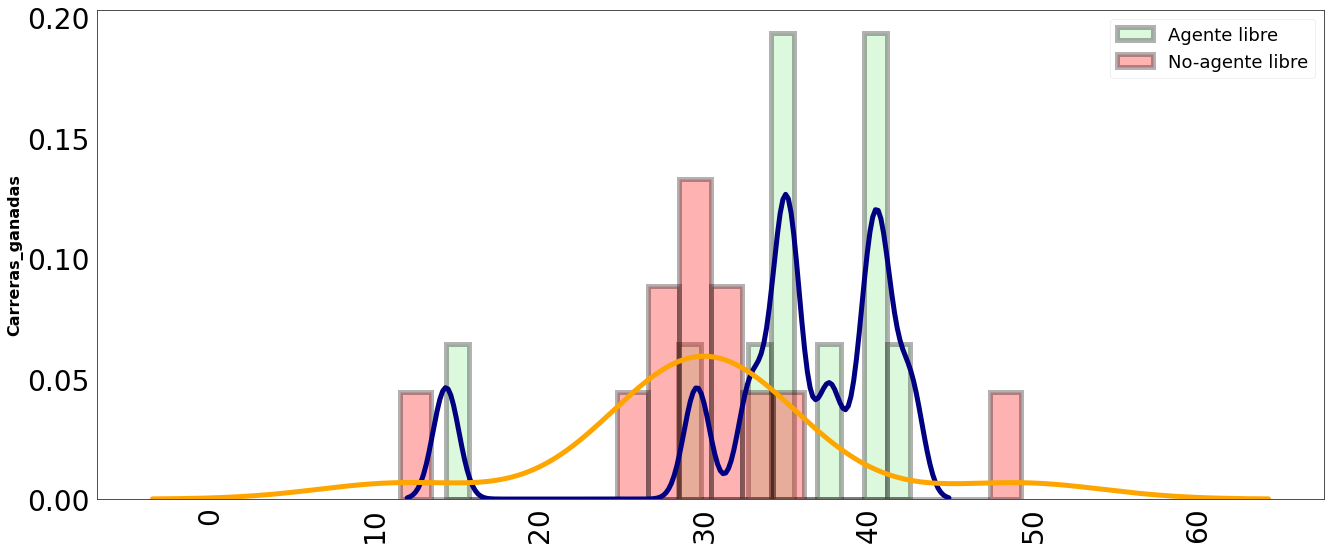

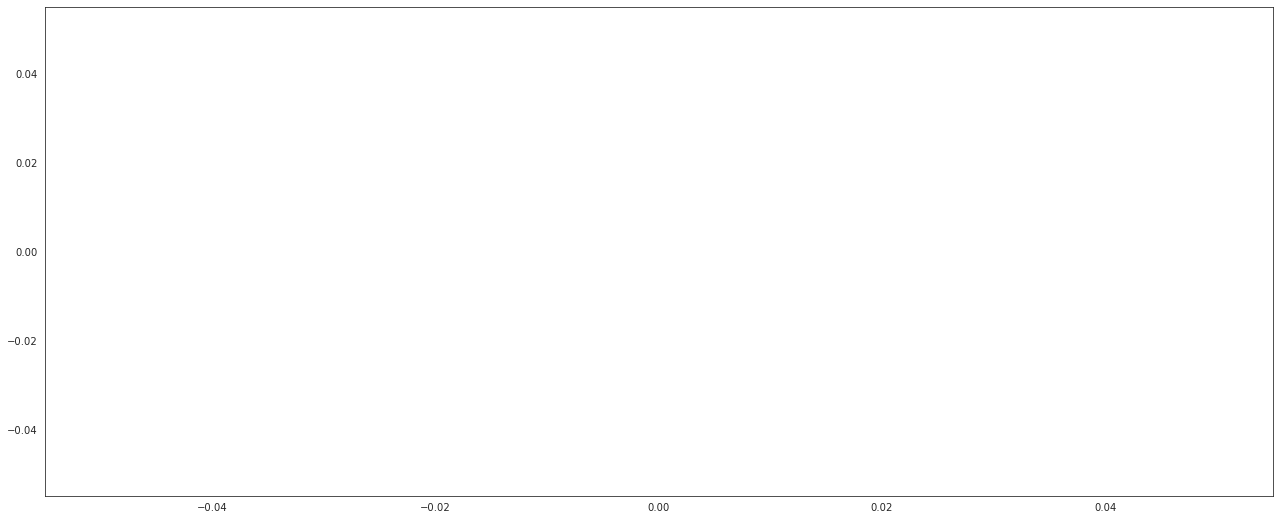

In [231]:
for i in range(0,len(pitcher_statistics)):
    print(pitcher_statistics[i])
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'Si'][pitcher_statistics[i]],
                     bins = 20,
                     hist_kws = {'color': 'lightgreen',
                                 'edgecolor': 'black',
                                 'linewidth': 5,
                                 'linestyle': 'solid',
                                 'alpha': 0.3},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['Agente_libre'] == 'No'][pitcher_statistics[i]],
                     bins = 20,
                     hist_kws = {'color': 'red',
                                 'edgecolor': 'black',
                                 'linewidth': 5,
                                 'linestyle': 'solid',
                                 'alpha': 0.3},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.6},
                     label = 'No-agente libre')
    g.set_xlabel('Temporadas',
                 fontsize = 16,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(pitcher_statistics[i], 
                 fontsize = 16,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 28,
                     labelcolor = 'black')
    g.tick_params(axis = 'x',
                  labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 18,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    #g.set(ylabel = None)
    g.patch.set_facecolor('white')

In [ ]:
g_4 = sns.distplot(e_vida_c['Expectativa_vida'], bins = 13,
             hist_kws={'color':'lightgreen', 'edgecolor':'#8e00ce',
                       'linewidth':3, 'linestyle':'dashdot',
                       'alpha':0.85},
             kde_kws={"color": "navy", "linewidth": 5},
             ax = axes[1,1])
g_4.set_ylabel('Densidad', fontsize = 20, fontweight = 'bold', color = 'midnightblue')
g_4.set_xlabel('Expectativa de vida [años]', fontsize = 20, fontweight = 'bold', color = 'midnightblue')  
g_4.tick_params(labelsize = 16, labelcolor = 'darkred')